<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Core-Independent-Project-Week-14/blob/main/Moringa_Core_Independent_Project_Week_14(Part_1_and_Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Research Question**
You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). In this part we are going to use Dimensionality Reduction and Feature selection to gain insights from the dataset that will help the marketing department.

#**Reading the dataset**

In [1]:
#Importing the library
#Reading the data
#Previewing the first six entries of the data.
library("data.table")
data = fread('http://bit.ly/CarreFourDataset')
head(data)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [2]:
#Previewing the last six entries of the dataset
tail(data)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


#**Checking the dataset**

In [3]:
#Checking the dimensions of the dataset.
dim(data)

[1] 1000   16

In [4]:
#Checking the structure of the data
str(data)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  16 variables:
 $ Invoice ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross margin percentage: num  4.76 4.7

In [5]:
#Removing white spaces from the column names
names(data)<-make.names(names(data),unique = TRUE)

In [6]:
#Assigning the correct data types to columns with wrong data types.
data$Branch <- as.factor(data$Branch)
data$Customer.type <- as.factor(data$Customer.type)
data$Gender <- as.factor(data$Gender)
data$Product.line <- as.factor(data$Product.line)
data$Payment <- as.factor(data$Payment)


In [7]:
# splitting the Date column into Day, Month, and Year columns, and storing the results as factors
data$Day <- as.factor(format(as.POSIXct(data$Date, format="%m/%d/%Y"), "%d"))
data$Month <- as.factor(format(as.POSIXct(data$Date, format="%m/%d/%Y"), "%m"))
data$Year <- as.factor(format(as.POSIXct(data$Date, format="%m/%d/%Y"), "%Y"))

# splitting the Time variable into Hour and Minute, and storing the results as factors
data$Hour <- as.factor(format(as.POSIXct(data$Time, format="%H:%M"), "%H"))
data$Minute <- as.factor(format(as.POSIXct(data$Time, format="%H:%M"), "%M"))

In [8]:
#Checking the column names.
names(data)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"                  
[17] "Day"                     "Month"                  
[19] "Year"                    "Hour"                   
[21] "Minute"

In [9]:
#Confirming if the variables have been assigned the correct data type
str(data)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  21 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 3

In [10]:
#Previewing the dataset
head(data)

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,⋯,cogs,gross.margin.percentage,gross.income,Rating,Total,Day,Month,Year,Hour,Minute
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,⋯,522.83,4.761905,26.1415,9.1,548.9715,05,01,2019,13,08
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,⋯,76.40,4.761905,3.8200,9.6,80.2200,08,03,2019,10,29
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,⋯,324.31,4.761905,16.2155,7.4,340.5255,03,03,2019,13,23
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,⋯,465.76,4.761905,23.2880,8.4,489.0480,27,01,2019,20,33
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,⋯,604.17,4.761905,30.2085,5.3,634.3785,08,02,2019,10,37
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,⋯,597.73,4.761905,29.8865,4.1,627.6165,25,03,2019,18,30


In [11]:
#Checking the number of columns in the dataset
ncol(data)

[1] 21

In [12]:
#Checking the number of rows in the dataset
nrow(data)

[1] 1000

#**Data Cleaning**

**Data Completeness**

In [13]:
#Finding the total missing values in each column
colSums(is.na(data))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total                     Day                   Month 
                      0                       0                       0 
                   Year                    Hour                  Minute 
                      0                       0                       0

There are no missing values in the dataset.

**Data Consistency**

In [14]:
#Checking for duplicates
anyDuplicated(data)

[1] 0

There are no duplicates in the dataset.

**Data Validity**

In [15]:
#Dropping unnecessary columns
data$Time <- NULL
data$Date <- NULL
data$Invoice.ID <- NULL
colnames(data)

[1] "Branch"                  "Customer.type"          
 [3] "Gender"                  "Product.line"           
 [5] "Unit.price"              "Quantity"               
 [7] "Tax"                     "Payment"                
 [9] "cogs"                    "gross.margin.percentage"
[11] "gross.income"            "Rating"                 
[13] "Total"                   "Day"                    
[15] "Month"                   "Year"                   
[17] "Hour"                    "Minute"

#**Dimensionality Reduction**

##**Principal Component Analysis(PCA)**

In [16]:
#Changing all variables to numeric
data$Branch <- as.numeric(data$Branch)
data$Customer.type <- as.numeric(data$Customer.type)
data$Gender <- as.numeric(data$Gender)
data$Product.line <- as.numeric(data$Product.line)
data$Payment <- as.numeric(data$Payment)
data$Day <- as.numeric(data$Day)
data$Month <- as.numeric(data$Month)
data$Year <- as.numeric(data$Year)
data$Hour <- as.numeric(data$Hour)
data$Minute <- as.numeric(data$Minute)
data$Quantity <- as.numeric(data$Quantity)

In [17]:
#Confirming if the variables have been changed to numeric.
str(data)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  18 variables:
 $ Branch                 : num  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : num  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : num  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : num  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : num  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : num  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Day                    : num  5 8 3 27 8 25 25 24 10 20 ...
 $ Month                  : num  1 3 3 1 2 3 2 2 1 2 ...
 $ Year    

In [18]:
#Previewing the dataset
head(data)

Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Day,Month,Year,Hour,Minute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,4,74.69,7,26.1415,3,522.83,4.761905,26.1415,9.1,548.9715,5,1,1,4,9
3,2,1,1,15.28,5,3.8200,1,76.40,4.761905,3.8200,9.6,80.2200,8,3,1,1,30
1,2,2,5,46.33,7,16.2155,2,324.31,4.761905,16.2155,7.4,340.5255,3,3,1,4,24
1,1,2,4,58.22,8,23.2880,3,465.76,4.761905,23.2880,8.4,489.0480,27,1,1,11,34
1,2,2,6,86.31,7,30.2085,3,604.17,4.761905,30.2085,5.3,634.3785,8,2,1,1,38
3,2,2,1,85.39,7,29.8865,3,597.73,4.761905,29.8865,4.1,627.6165,25,3,1,9,31


In [19]:
#Checking the standard deviation of different variables.
sd(data$Branch)
sd(data$Customer.type)
sd(data$Gender)
sd(data$Product.line)
sd(data$Payment)
sd(data$Unit.price)
sd(data$Quantity)
sd(data$Tax)
sd(data$Total)
sd(data$Day)
sd(data$Month)
sd(data$Minute)
sd(data$Year)
sd(data$Hour)
sd(data$cogs)
sd(data$gross.income)
sd(data$gross.margin.percentage)
sd(data$Rating)

[1] 0.8176335

[1] 0.5002492

[1] 0.5002492

[1] 1.715412

[1] 0.830475

[1] 26.49463

[1] 2.923431

[1] 11.70883

[1] 245.8853

[1] 8.693563

[1] 0.8352536

[1] 16.88068

[1] 0

[1] 3.186857

[1] 234.1765

[1] 11.70883

[1] 0

[1] 1.71858

In [20]:
#Dropping variables which have a standard deviation of 0
data$gross.margin.percentage <- NULL
data$Year <- NULL

In [21]:
# We then pass data to the prcomp(). We also set two arguments, center and scale, 
# to be TRUE then preview our object with summary
data.pca <- prcomp(data, center = TRUE, scale. = TRUE)
summary(data.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2205 1.0874 1.08282 1.05002 1.02123 1.01763 0.99088
Proportion of Variance 0.3081 0.0739 0.07328 0.06891 0.06518 0.06472 0.06136
Cumulative Proportion  0.3081 0.3821 0.45533 0.52424 0.58942 0.65414 0.71551
                          PC8    PC9    PC10    PC11    PC12   PC13      PC14
Standard deviation     0.9757 0.9641 0.95863 0.92025 0.90270 0.2994 2.718e-16
Proportion of Variance 0.0595 0.0581 0.05744 0.05293 0.05093 0.0056 0.000e+00
Cumulative Proportion  0.7750 0.8331 0.89054 0.94347 0.99440 1.0000 1.000e+00
                          PC15      PC16
Standard deviation     1.8e-16 9.964e-17
Proportion of Variance 0.0e+00 0.000e+00
Cumulative Proportion  1.0e+00 1.000e+00

PC1 explains 30.81% of the total variance and PC2 explains 7.39% of the total variance.

In [22]:
# Calling str() to have a look at your PCA object
str(data.pca)

List of 5
 $ sdev    : num [1:16] 2.22 1.09 1.08 1.05 1.02 ...
 $ rotation: num [1:16, 1:16] 0.0224 -0.0125 -0.0283 0.0174 0.2911 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:16] 1.99 1.5 1.5 3.45 55.67 ...
  ..- attr(*, "names")= chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ scale   : Named num [1:16] 0.818 0.5 0.5 1.715 26.495 ...
  ..- attr(*, "names")= chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ x       : num [1:1000, 1:16] 2.05 -2.287 0.126 1.466 2.743 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


Loading required package: usethis




plyr (NA -> 1.8.6) [CRAN]


Installing 1 packages: plyr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpFpmXi1/remotes1f943df60af/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: plyr

Loading required package: scales

Loading required package: grid



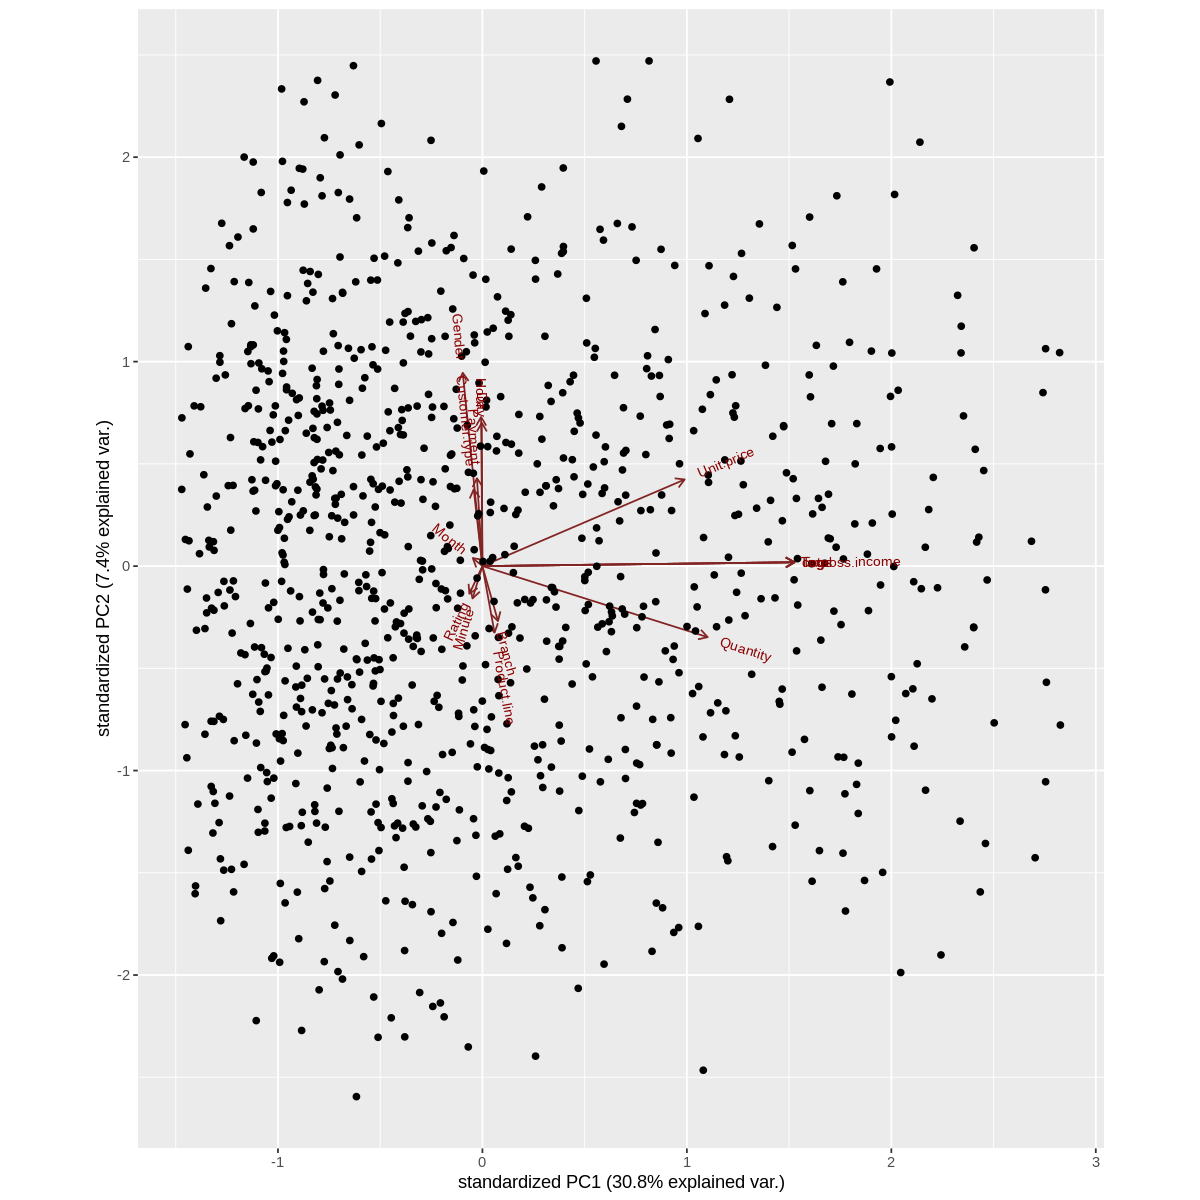

In [23]:
# Installing our ggbiplot visualisation package
# 
library(devtools)
install_github("vqv/ggbiplot")
# Then Loading our ggbiplot library
#  
library(ggbiplot)
options(repr.plot.width = 10, repr.plot.height = 10)
ggbiplot(data.pca)

We can observe that unit price, total income and quantity contribute to PCA1.

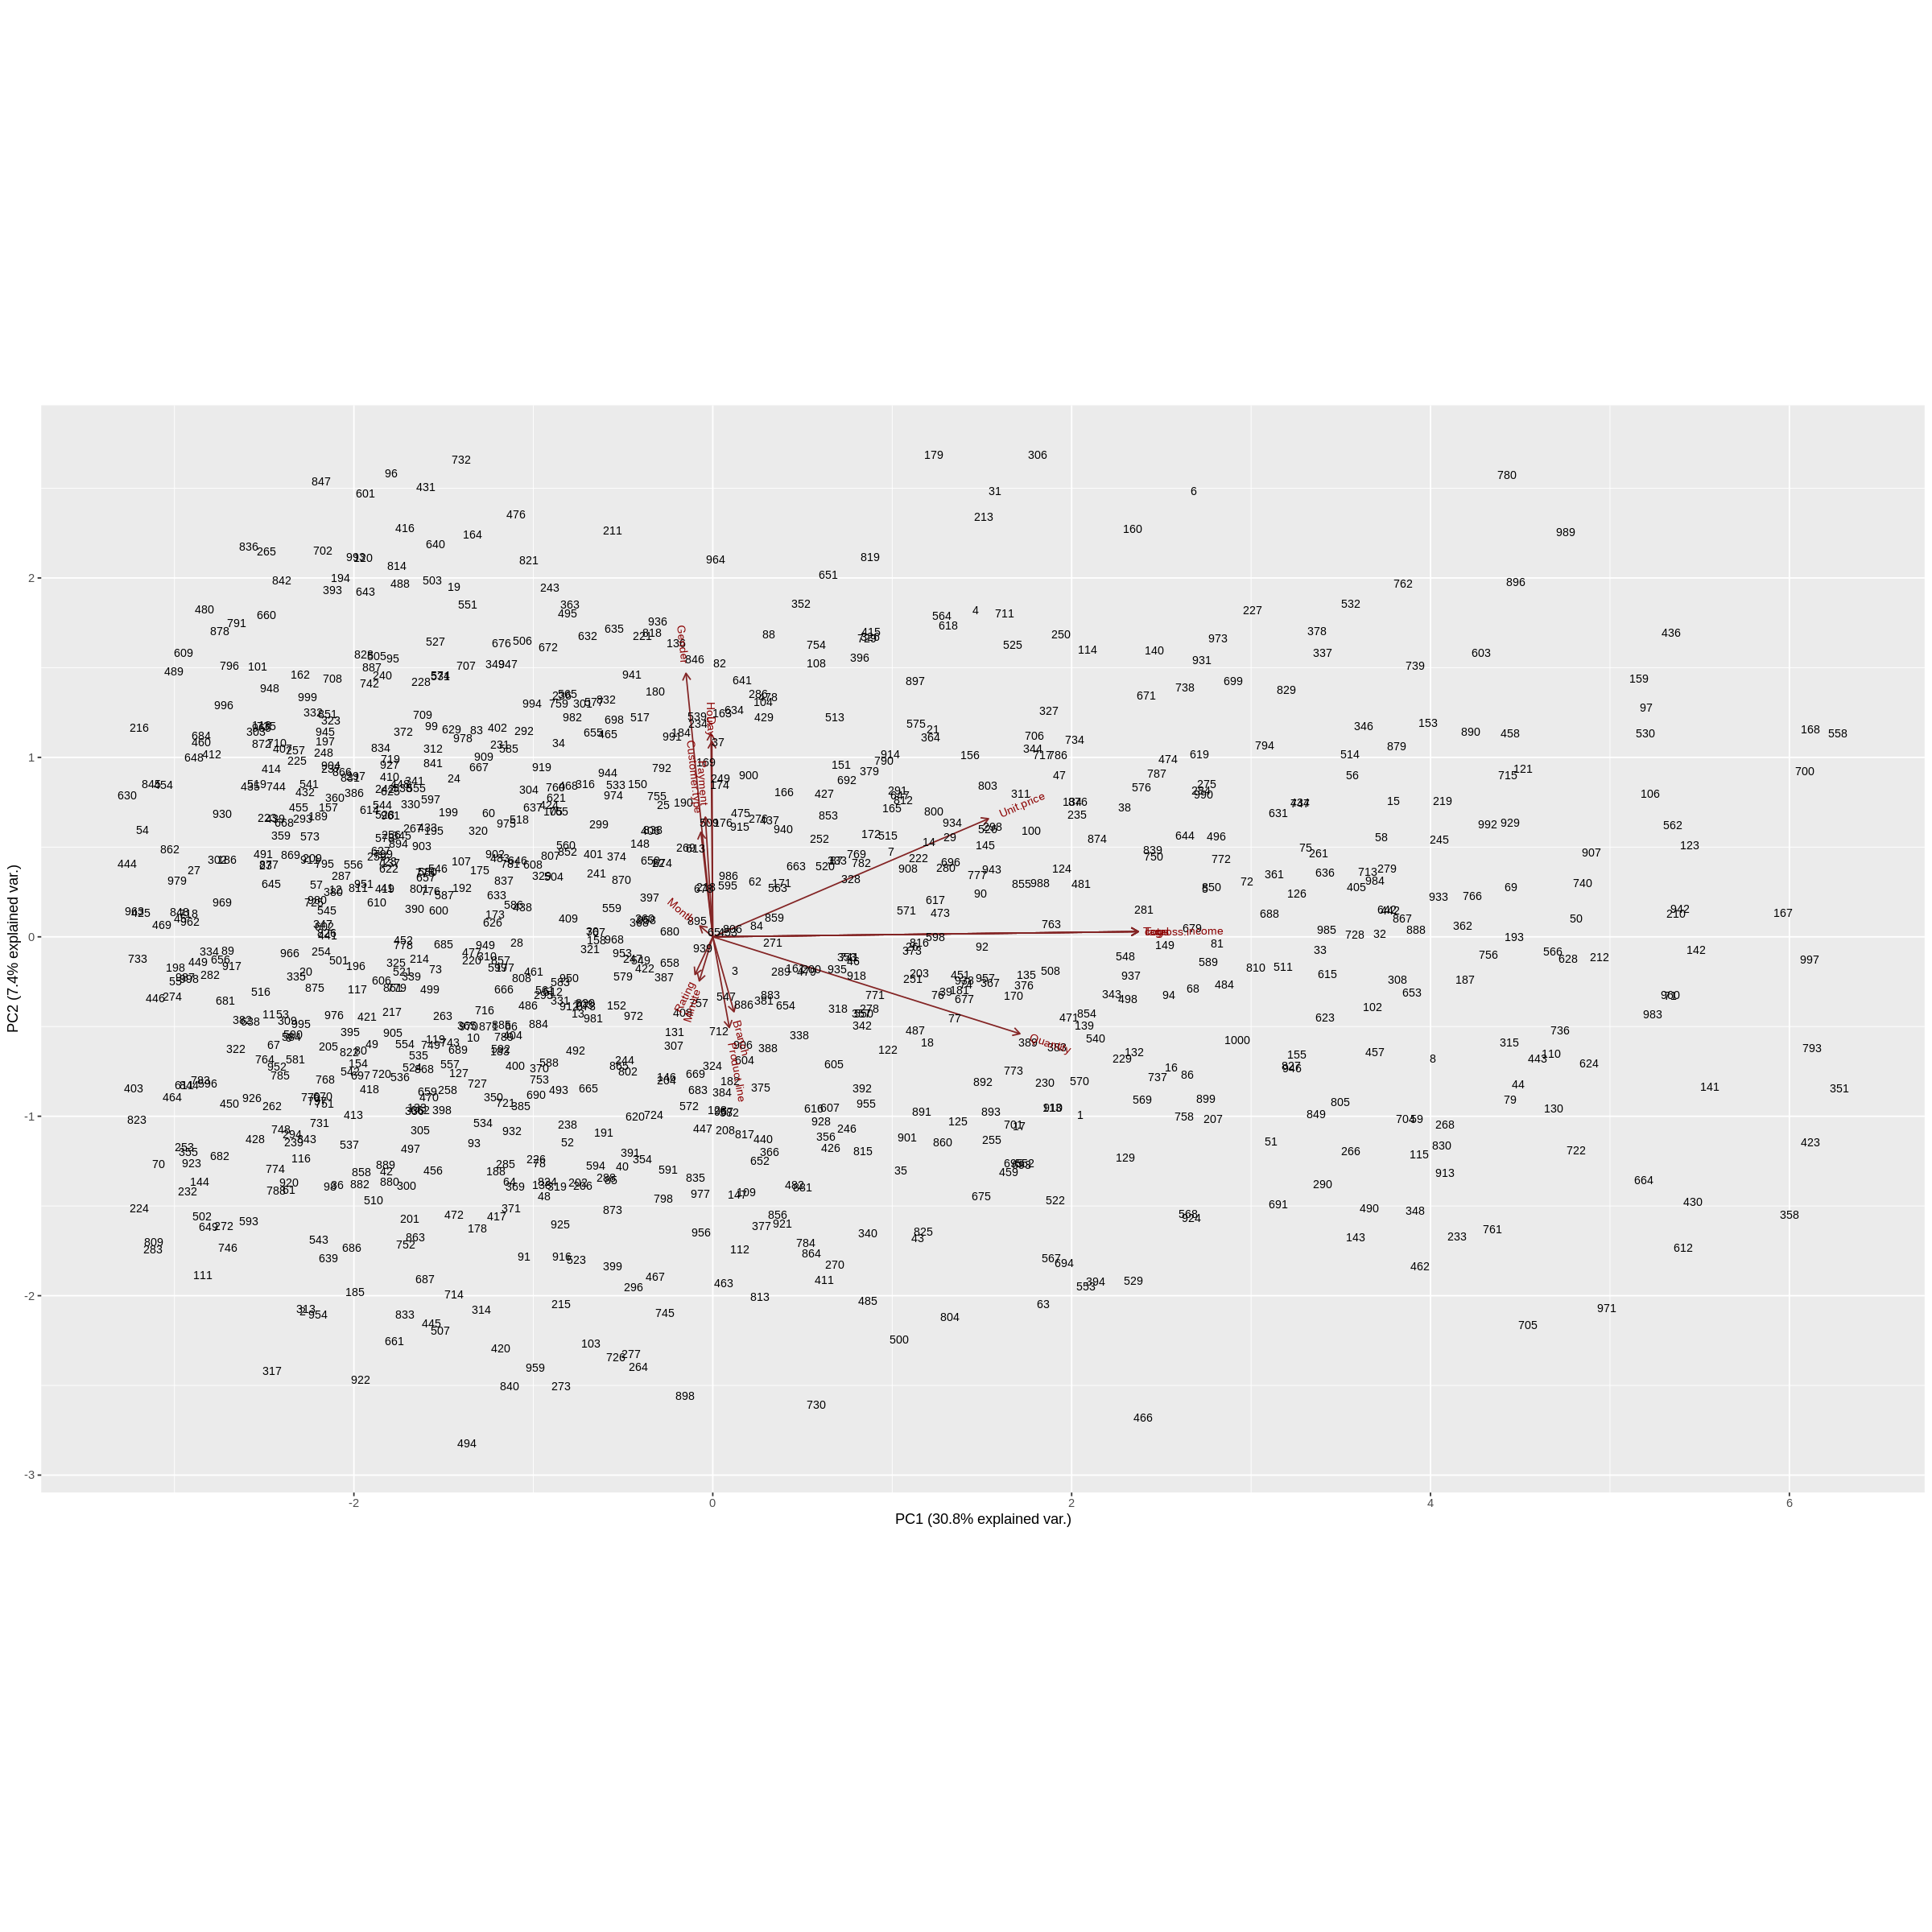

In [24]:
# Adding more detail to the plot, we provide arguments rownames as labels
# 
options(repr.plot.width = 20, repr.plot.height = 20)
ggbiplot(data.pca, labels=rownames(data), obs.scale = 1, var.scale = 1)

##**t-Distributed Stochastic Neighbor Embedding (t-SNE)**

In [25]:
# Installing Rtnse package
# 
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
# Loading our tnse library
# 
library(Rtsne)

In [27]:
# Curating the database for analysis 
# Using Branch as the factor.
data_branch <- data
data_branch$Branch<-as.factor(data_branch$Branch)

# For plotting
#
colors = rainbow(length(unique(data_branch$Branch)))
names(colors) = unique(data_branch$Branch)

In [28]:
# Executing the algorithm on curated data
tsne <- Rtsne(data_branch[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
# Getting the duration of execution
exeTimeTsne <- system.time(Rtsne(data_branch[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))

Performing PCA
Read the 1000 x 15 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.09 seconds (sparsity = 0.101692)!
Learning embedding...
Iteration 50: error is 60.450053 (50 iterations in 0.15 seconds)
Iteration 100: error is 53.883532 (50 iterations in 0.12 seconds)
Iteration 150: error is 52.936832 (50 iterations in 0.11 seconds)
Iteration 200: error is 52.501487 (50 iterations in 0.11 seconds)
Iteration 250: error is 52.186685 (50 iterations in 0.11 seconds)
Iteration 300: error is 0.721768 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.557150 (50 iterations in 0.11 seconds)
Iteration 400: error is 0.512822 (50 iterations in 0.11 seconds)
Iteration 450: error is 0.494608 (50 iterations in 0.11 seconds)
Iteration 500: error is 0.483137 (50 iterations in 0.12 seconds)
Fitting performed in 1.17 seconds.
Performing PCA
Read the 1000 x 15 data mat

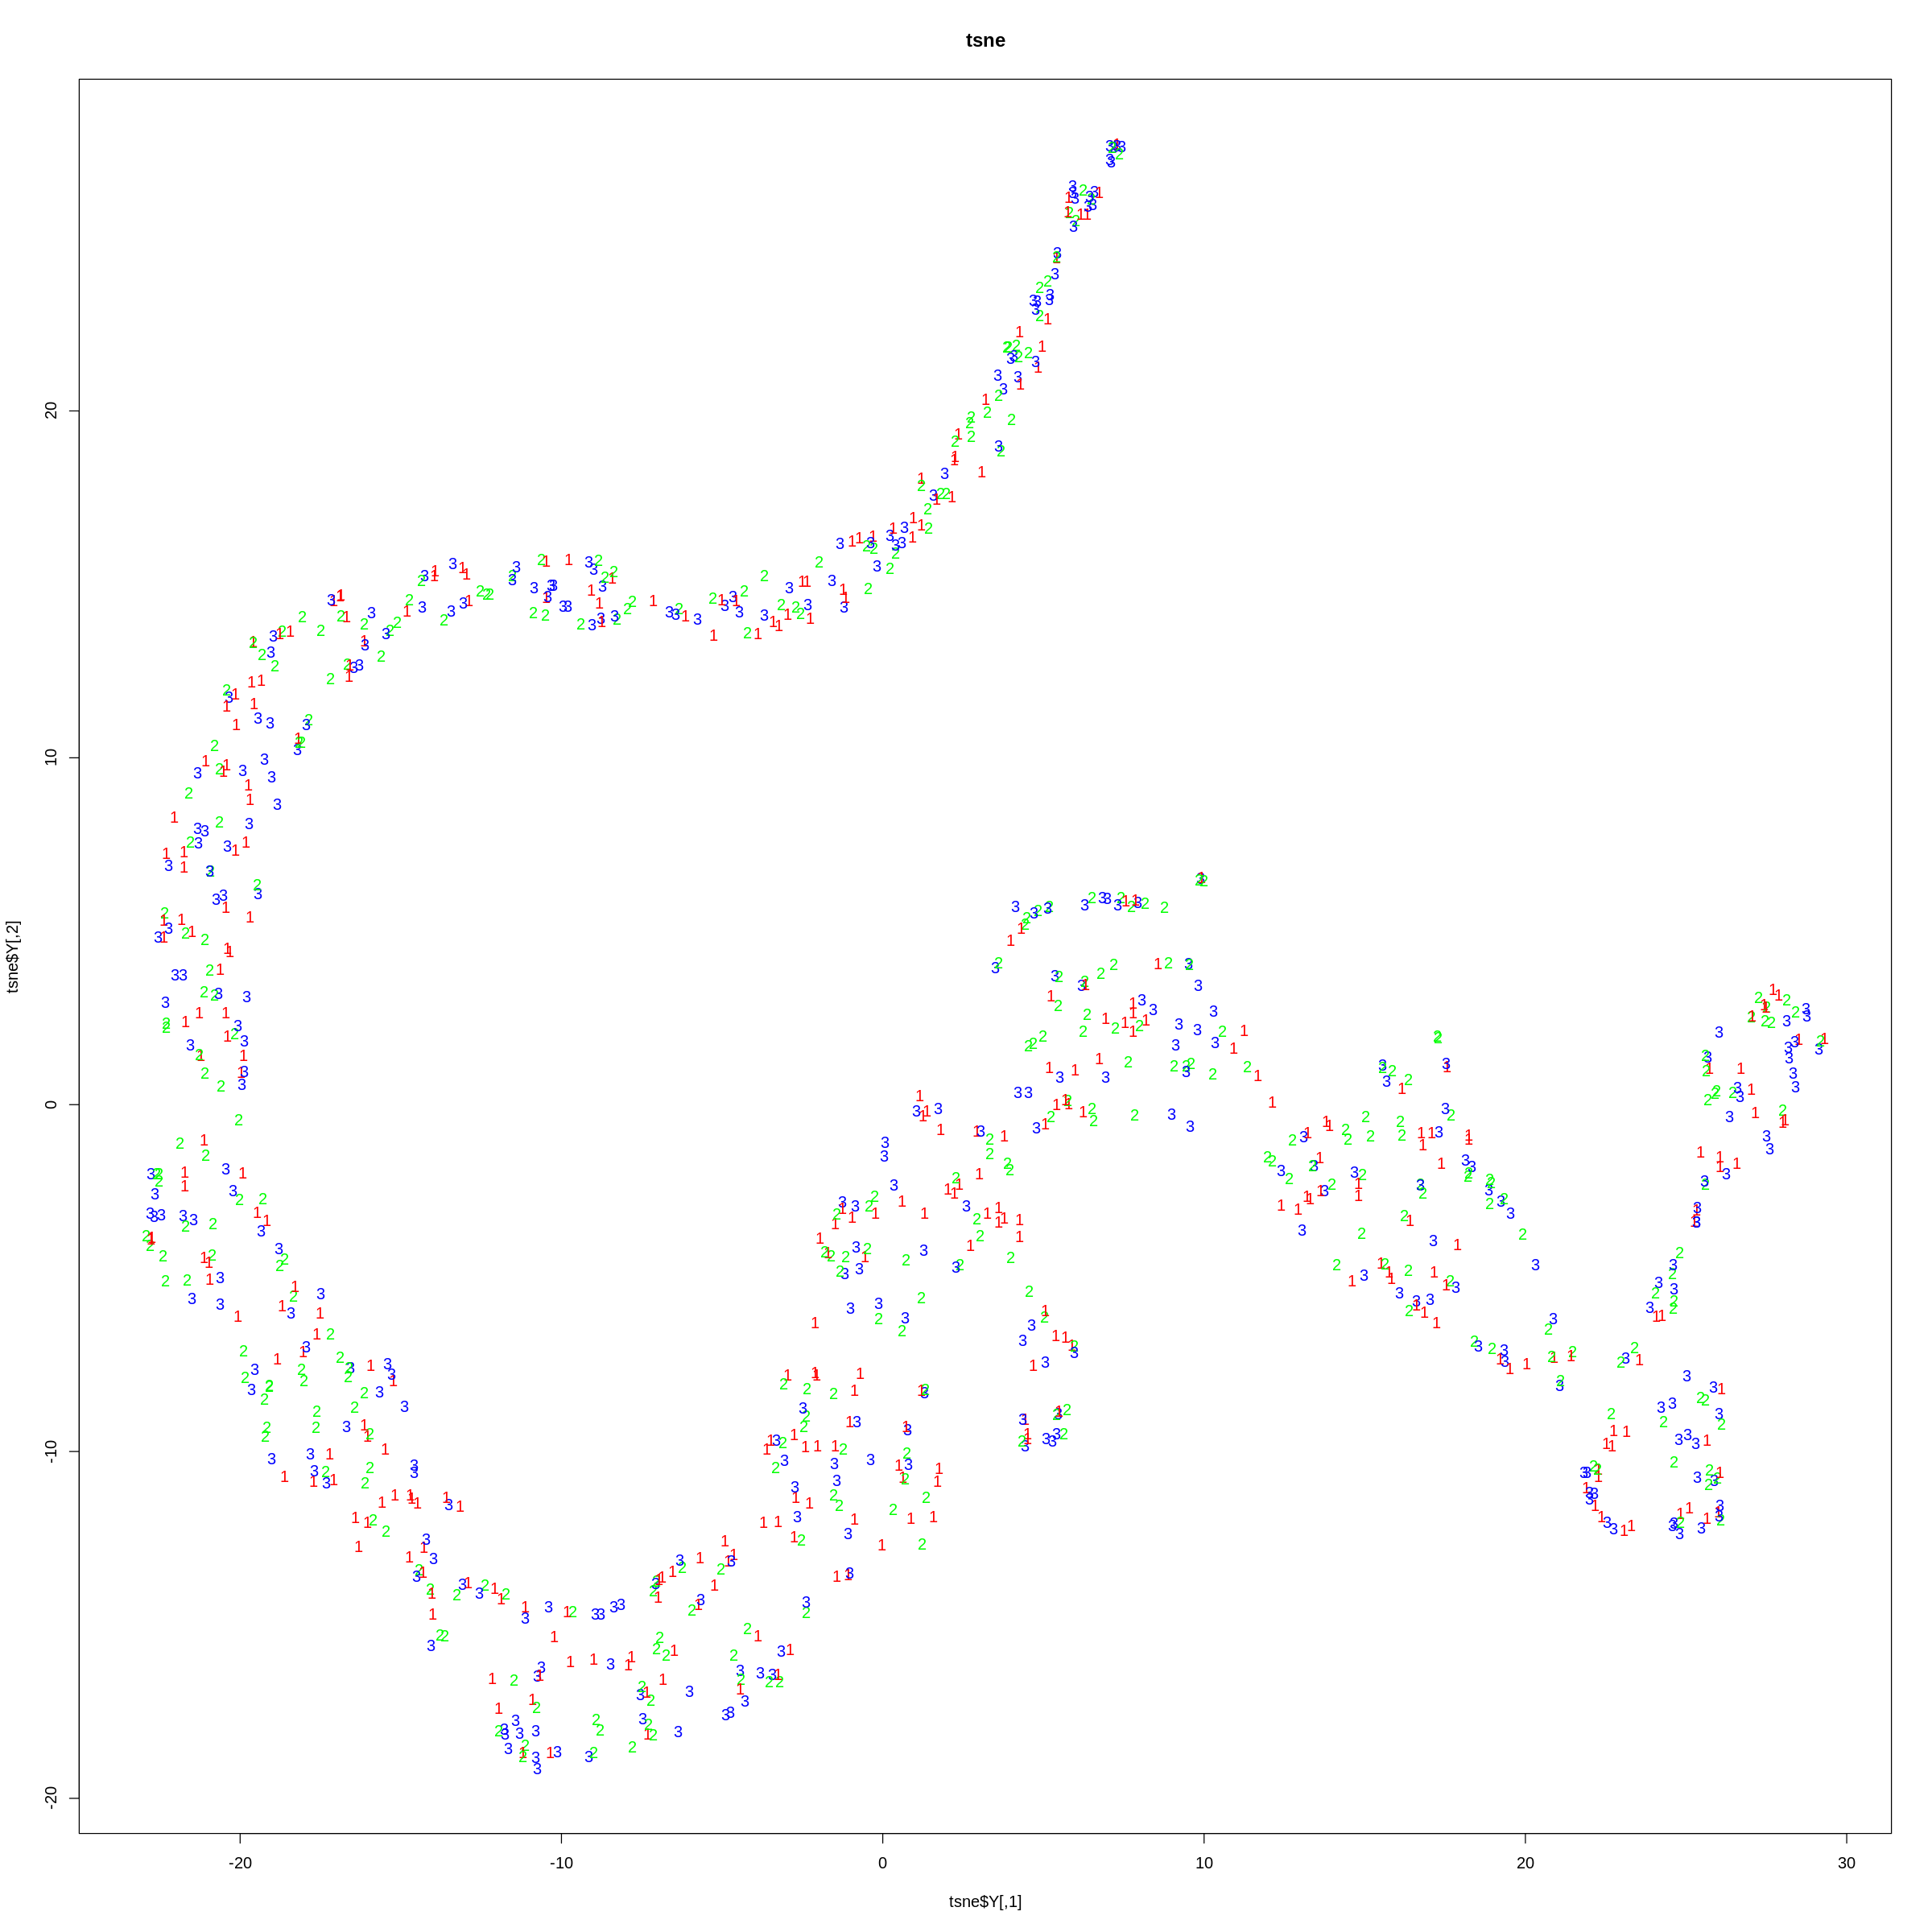

In [29]:
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=data_branch$Branch, col=colors[data_branch$Branch])

Performing PCA
Read the 1000 x 16 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.10 seconds (sparsity = 0.101690)!
Learning embedding...
Iteration 50: error is 60.353786 (50 iterations in 0.14 seconds)
Iteration 100: error is 55.089076 (50 iterations in 0.12 seconds)
Iteration 150: error is 54.419128 (50 iterations in 0.12 seconds)
Iteration 200: error is 54.294665 (50 iterations in 0.11 seconds)
Iteration 250: error is 54.252091 (50 iterations in 0.11 seconds)
Iteration 300: error is 0.748734 (50 iterations in 0.11 seconds)
Iteration 350: error is 0.581467 (50 iterations in 0.11 seconds)
Iteration 400: error is 0.538604 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.519419 (50 iterations in 0.11 seconds)
Iteration 500: error is 0.512043 (50 iterations in 0.11 seconds)
Fitting performed in 1.17 seconds.
Performing PCA
Read the 1000 x 16 data mat

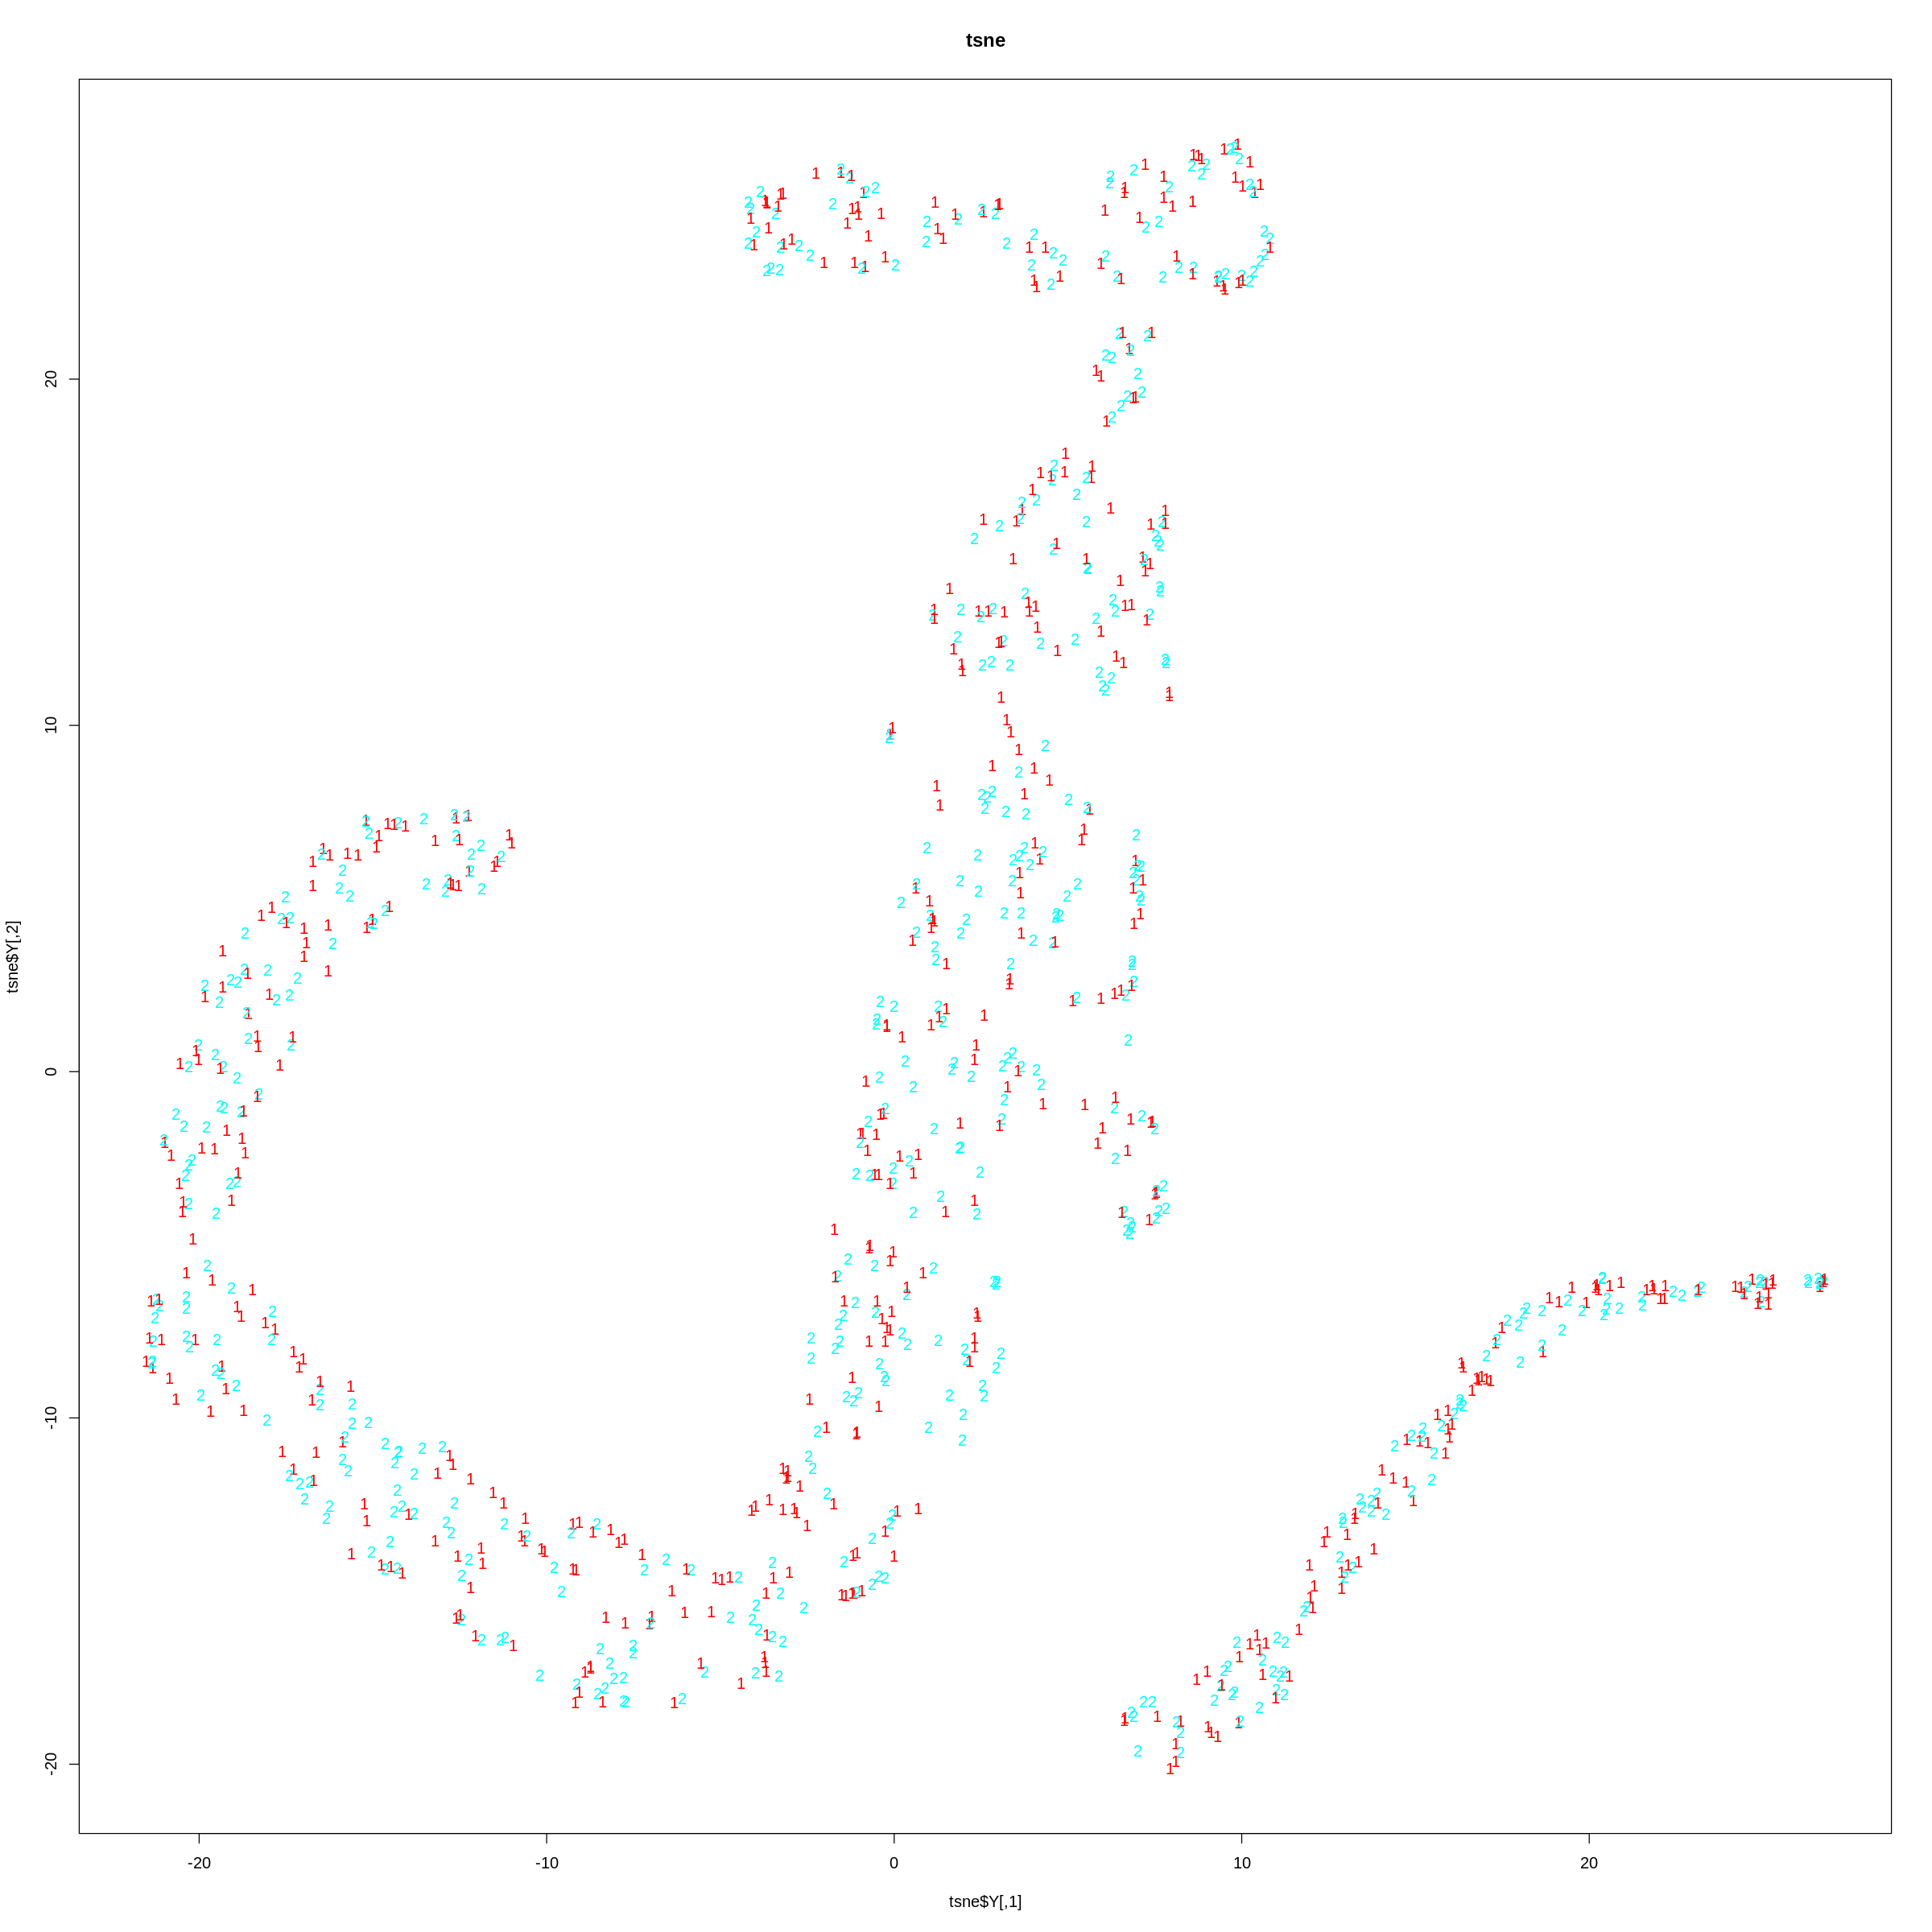

In [30]:
# Curating the database for analysis 
# Using Customer.type as the factor.
data_customer <- data
data_customer$Customer.type<-as.factor(data_customer$Customer.type)

# For plotting
#
colors = rainbow(length(unique(data_customer$Customer.type)))
names(colors) = unique(data_customer$Customer.type)

# Executing the algorithm on curated data
tsne <- Rtsne(data_customer[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
# Getting the duration of execution
exeTimeTsne <- system.time(Rtsne(data_customer[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=data_customer$Customer.type, col=colors[data_customer$Customer.type])

Performing PCA
Read the 1000 x 16 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.101690)!
Learning embedding...
Iteration 50: error is 61.541139 (50 iterations in 0.14 seconds)
Iteration 100: error is 53.341183 (50 iterations in 0.12 seconds)
Iteration 150: error is 52.326397 (50 iterations in 0.12 seconds)
Iteration 200: error is 51.977599 (50 iterations in 0.12 seconds)
Iteration 250: error is 51.882147 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.730408 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.558803 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.512967 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.492148 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.476465 (50 iterations in 0.12 seconds)
Fitting performed in 1.21 seconds.
Performing PCA
Read the 1000 x 16 data mat

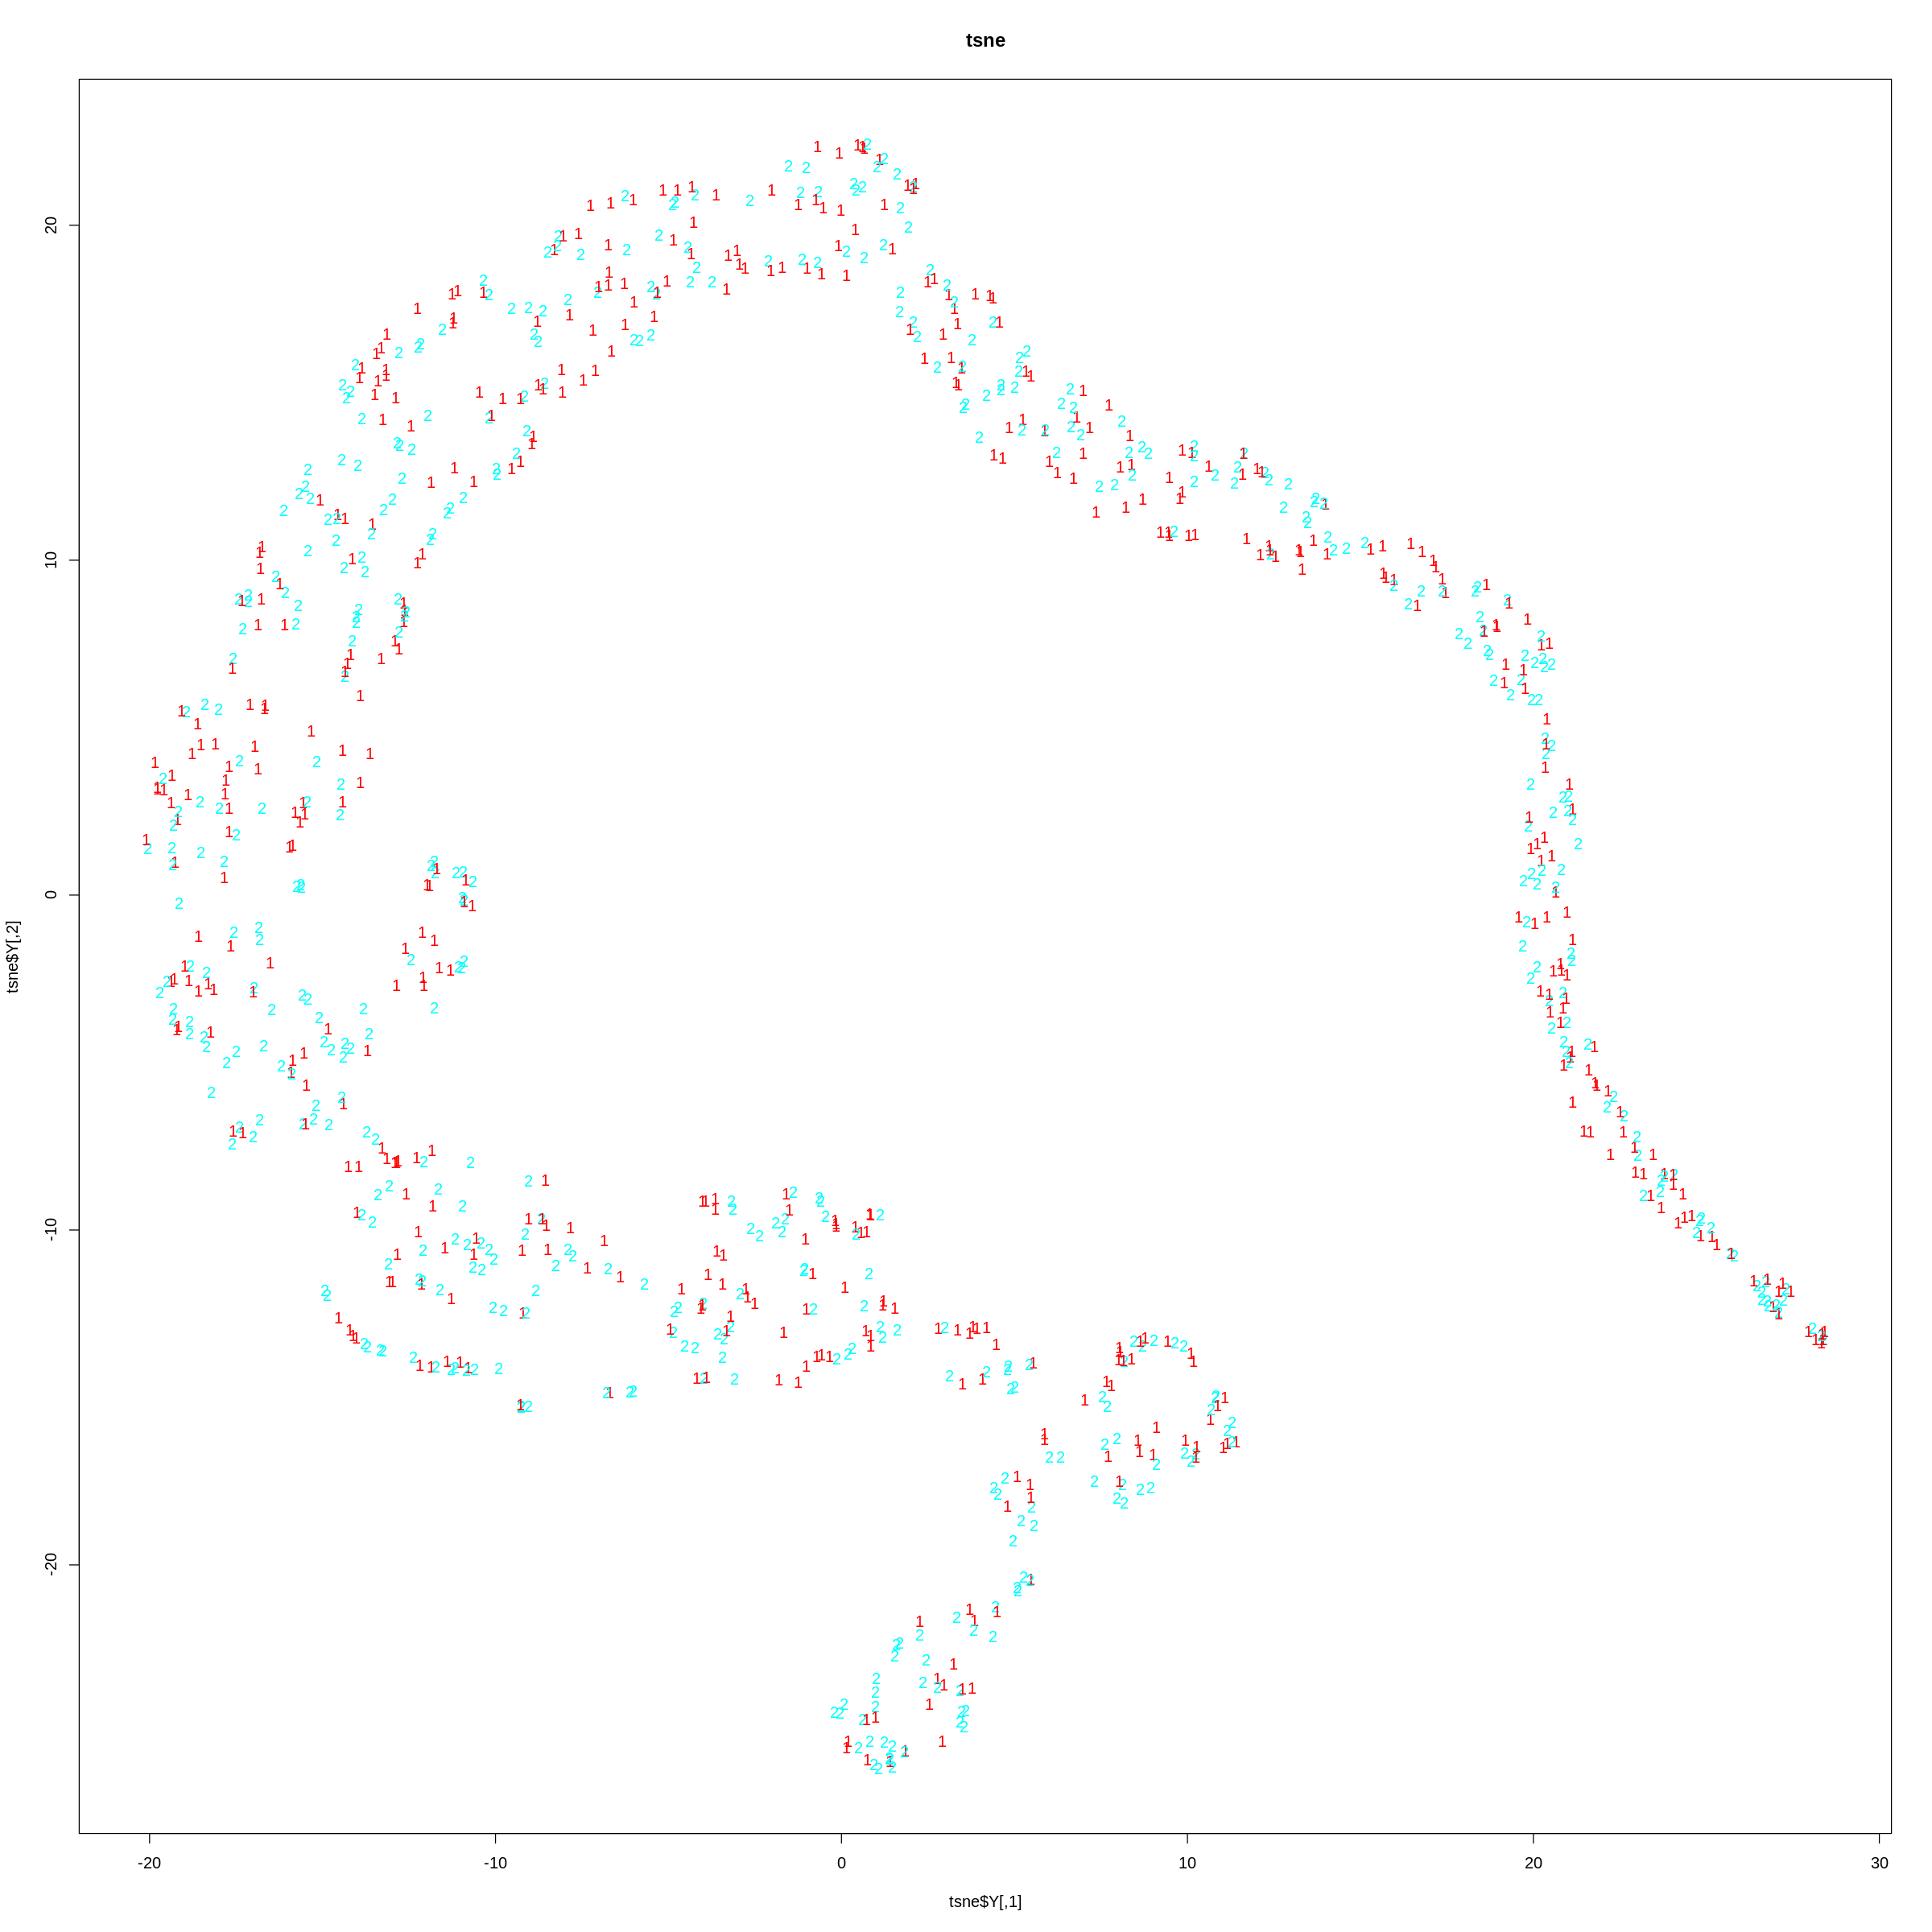

In [31]:
# Curating the database for analysis 
# Using Gender as the factor.
data_gender <- data
data_gender$Gender<-as.factor(data_gender$Gender)

# For plotting
#
colors = rainbow(length(unique(data_gender$Gender)))
names(colors) = unique(data_gender$Gender)

# Executing the algorithm on curated data
tsne <- Rtsne(data_gender[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
# Getting the duration of execution
exeTimeTsne <- system.time(Rtsne(data_gender[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=data_gender$Gender, col=colors[data_gender$Gender])

Performing PCA
Read the 1000 x 20 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.10 seconds (sparsity = 0.101696)!
Learning embedding...
Iteration 50: error is 61.138712 (50 iterations in 0.15 seconds)
Iteration 100: error is 53.965392 (50 iterations in 0.13 seconds)
Iteration 150: error is 53.068163 (50 iterations in 0.13 seconds)
Iteration 200: error is 52.732288 (50 iterations in 0.12 seconds)
Iteration 250: error is 52.543604 (50 iterations in 0.13 seconds)
Iteration 300: error is 0.698239 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.545471 (50 iterations in 0.11 seconds)
Iteration 400: error is 0.510711 (50 iterations in 0.11 seconds)
Iteration 450: error is 0.496703 (50 iterations in 0.11 seconds)
Iteration 500: error is 0.484844 (50 iterations in 0.12 seconds)
Fitting performed in 1.24 seconds.
Performing PCA
Read the 1000 x 20 data mat

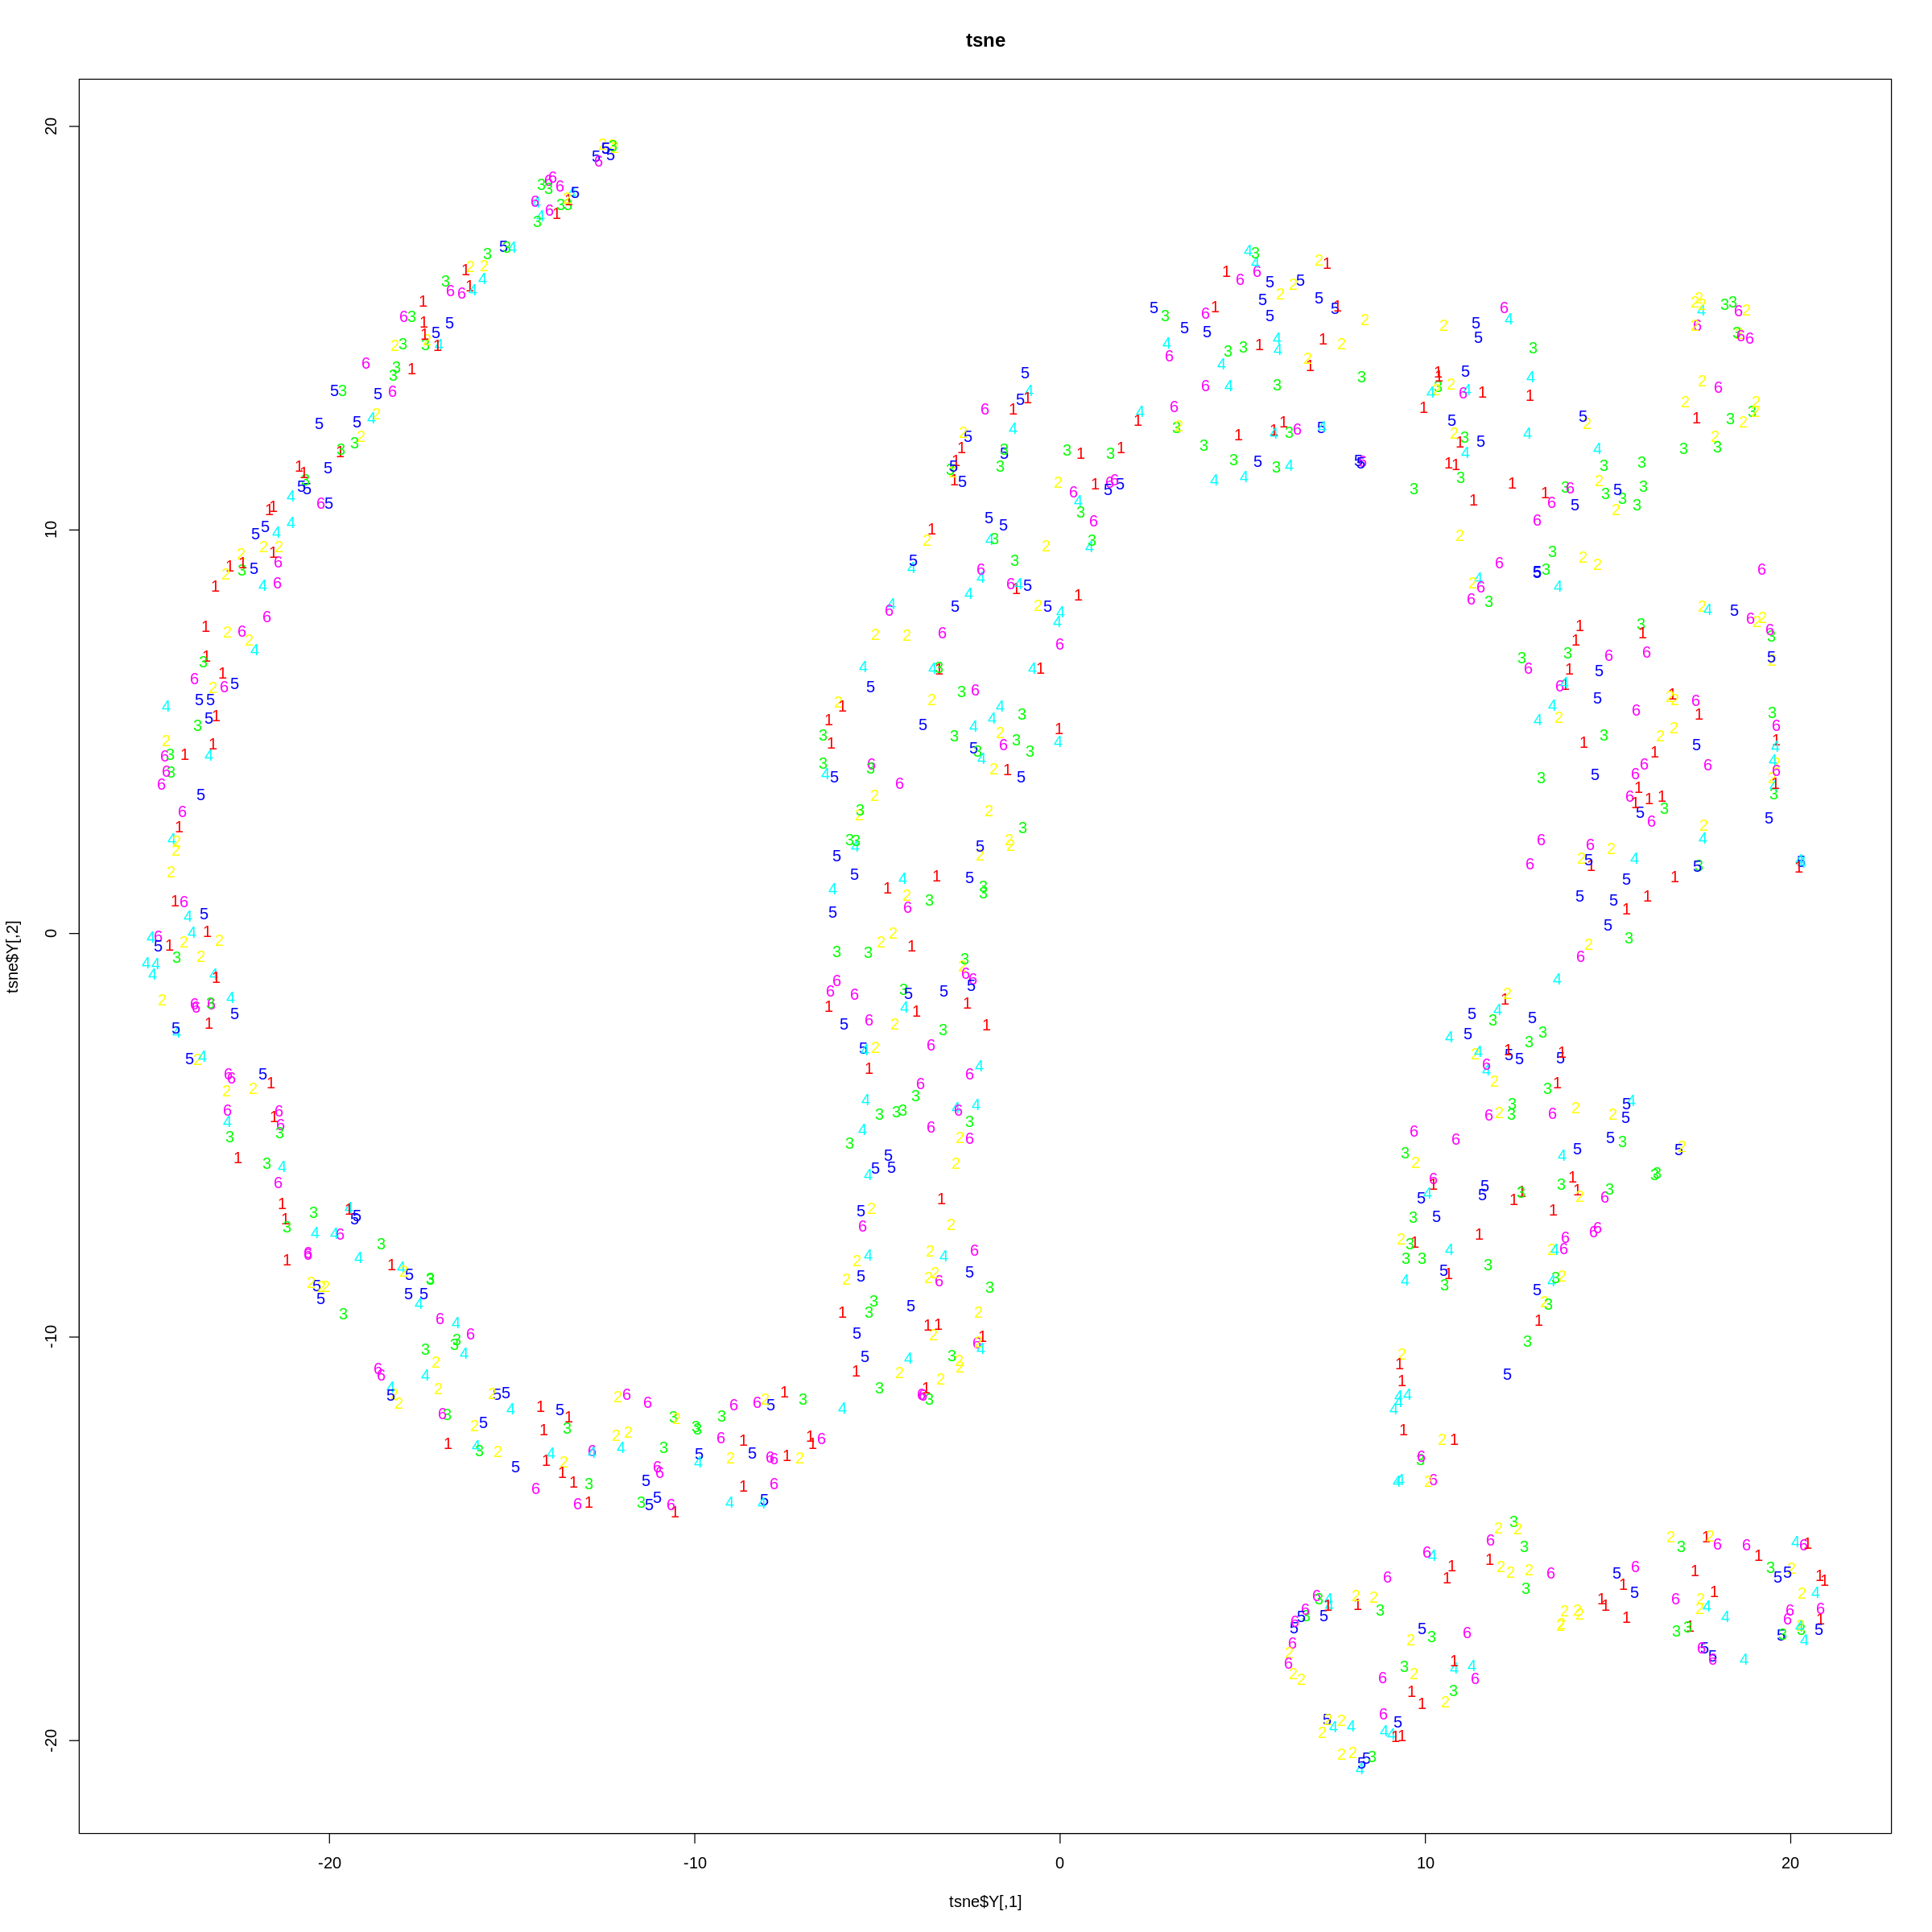

In [32]:
# Curating the database for analysis 
# Using Product.line as the factor.
data_product <- data
data_product$Product.line<-as.factor(data_product$Product.line)

# For plotting
#
colors = rainbow(length(unique(data_product$Product.line)))
names(colors) = unique(data_product$Product.line)

# Executing the algorithm on curated data
tsne <- Rtsne(data_product[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
# Getting the duration of execution
exeTimeTsne <- system.time(Rtsne(data_product[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=data_product$Product.line, col=colors[data_product$Product.line])

Performing PCA
Read the 1000 x 17 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.101688)!
Learning embedding...
Iteration 50: error is 62.467088 (50 iterations in 0.16 seconds)
Iteration 100: error is 53.932155 (50 iterations in 0.13 seconds)
Iteration 150: error is 52.528887 (50 iterations in 0.12 seconds)
Iteration 200: error is 52.097128 (50 iterations in 0.13 seconds)
Iteration 250: error is 51.935833 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.726135 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.566761 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.522276 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.498492 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.484397 (50 iterations in 0.12 seconds)
Fitting performed in 1.25 seconds.
Performing PCA
Read the 1000 x 17 data mat

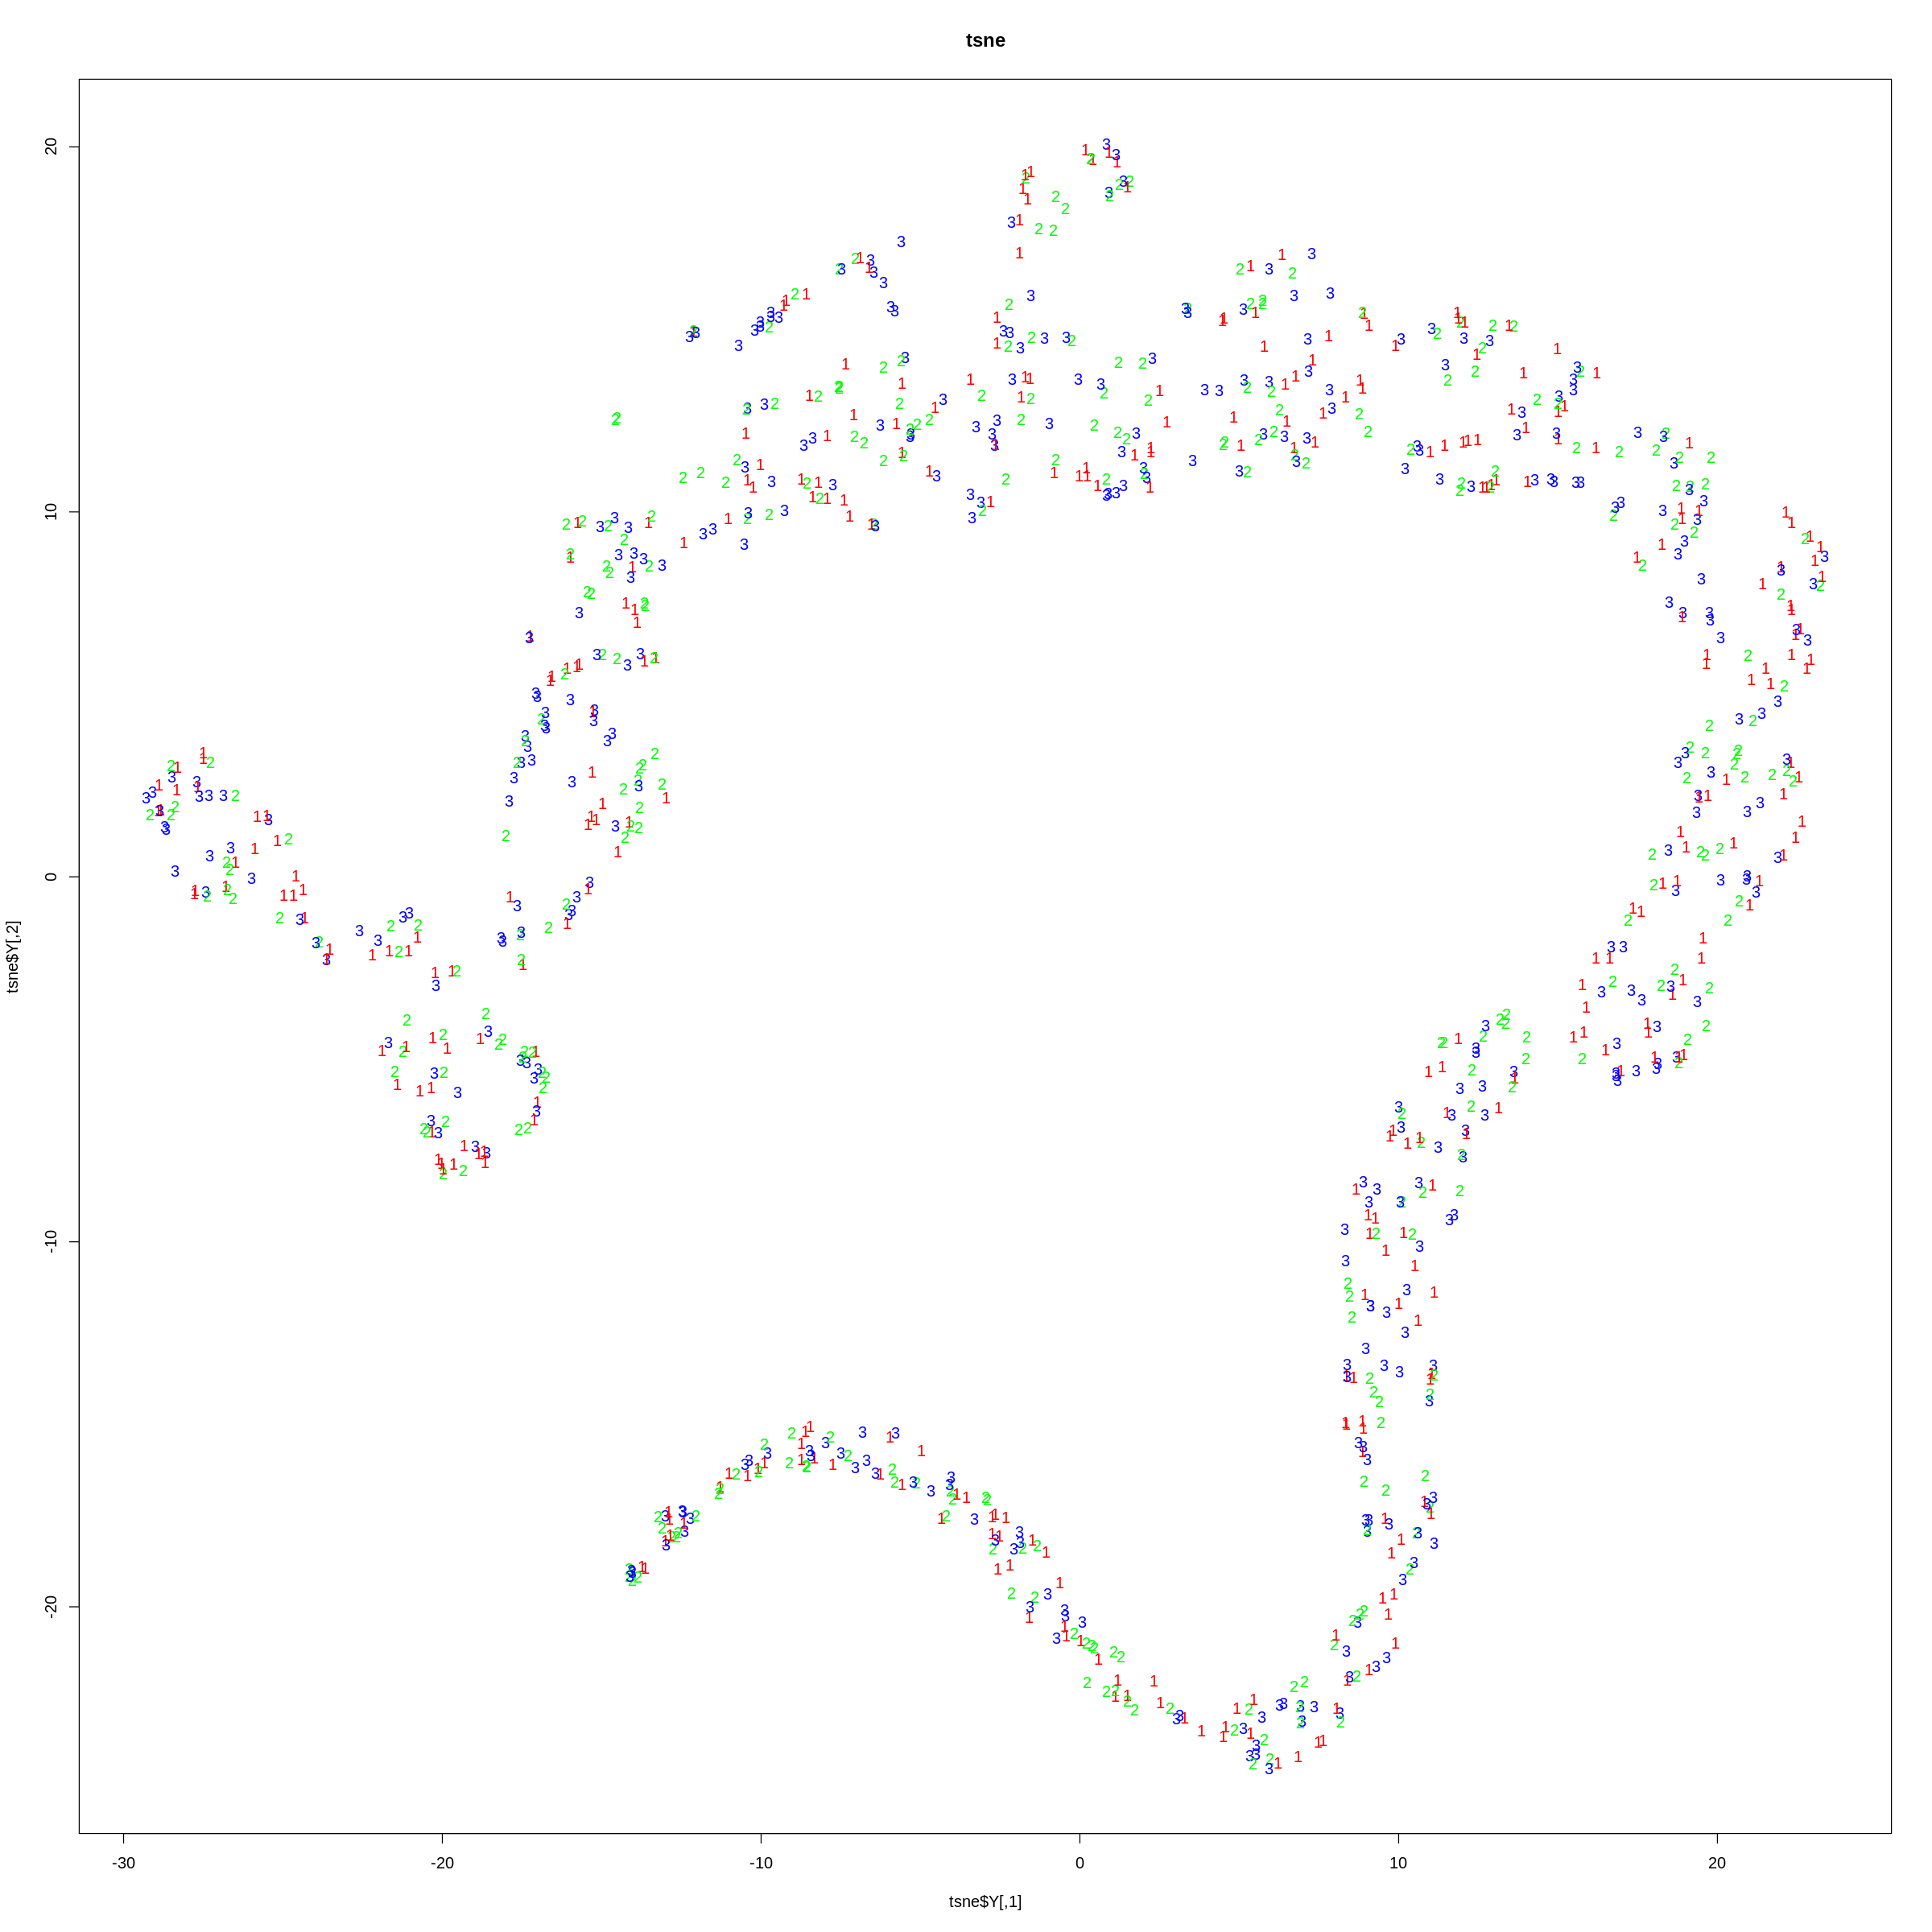

In [33]:
# Curating the database for analysis 
# Using Payment as the factor.
data_payment <- data
data_payment$Payment<-as.factor(data_payment$Payment)

# For plotting
#
colors = rainbow(length(unique(data_payment$Payment)))
names(colors) = unique(data_payment$Payment)

# Executing the algorithm on curated data
tsne <- Rtsne(data_payment[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
# Getting the duration of execution
exeTimeTsne <- system.time(Rtsne(data_payment[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=data_payment$Payment, col=colors[data_payment$Payment])

#**Feature Selection**

##**Filter Method**

In [34]:
# Installing and loading our caret package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [35]:
# Installing and loading the corrplot package for plotting
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(corrplot, quietly=TRUE))
                install.packages("corrplot")))
library(corrplot)

corrplot 0.88 loaded



In [36]:
# Calculating the correlation matrix
correlationMatrix <- cor(data)
correlationMatrix

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total,Day,Month,Hour,Minute
Branch,1.00000000,-0.019607869,-0.056317558,-0.053937557,0.028202440,0.015963788,0.04104666,-0.050104288,0.04104666,0.04104666,0.010238476,0.04104666,-0.013086533,-0.035300925,0.033007115,0.038378328
Customer.type,-0.01960787,1.000000000,0.039996160,-0.036800311,-0.020237875,-0.016762706,-0.01967028,0.018073436,-0.01967028,-0.01967028,0.018888672,-0.01967028,0.034124208,0.005972443,-0.018893298,-0.012909043
Gender,-0.05631756,0.039996160,1.000000000,0.005193197,0.015444630,-0.074258307,-0.04945099,0.044577609,-0.04945099,-0.04945099,0.004800208,-0.04945099,0.051156850,0.027533609,0.084081139,0.009257593
Product.line,-0.05393756,-0.036800311,0.005193197,1.000000000,0.019321028,0.020256001,0.03162072,0.029896383,0.03162072,0.03162072,-0.020528973,0.03162072,-0.050926658,-0.026433391,-0.060849916,0.018725704
Unit.price,0.02820244,-0.020237875,0.015444630,0.019321028,1.000000000,0.010777564,0.63396209,-0.015941048,0.63396209,0.63396209,-0.008777507,0.63396209,0.057020896,-0.027387186,0.008242210,-0.006868818
Quantity,0.01596379,-0.016762706,-0.074258307,0.020256001,0.010777564,1.000000000,0.70551019,-0.003920990,0.70551019,0.70551019,-0.015814905,0.70551019,-0.043346859,-0.014524276,-0.007316886,-0.014928556
Tax,0.04104666,-0.019670283,-0.049450989,0.031620725,0.633962089,0.705510186,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899
Payment,-0.05010429,0.018073436,0.044577609,0.029896383,-0.015941048,-0.003920990,-0.01243364,1.000000000,-0.01243364,-0.01243364,-0.005381289,-0.01243364,-0.004333547,0.031757801,0.045420537,0.000421422
cogs,0.04104666,-0.019670283,-0.049450989,0.031620725,0.633962089,0.705510186,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899
gross.income,0.04104666,-0.019670283,-0.049450989,0.031620725,0.633962089,0.705510186,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899


In [37]:
# Find attributes that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)
highlyCorrelated

[1]  9 12  7

Variables number 7, 9 and 12 are highly correlated.

In [38]:
#Checking the names of the highly correlated variables.
names(data[,..highlyCorrelated])

[1] "cogs"  "Total" "Tax"

In [39]:
# Removing Redundant Features 
data_filtered<-data[,-..highlyCorrelated]
head(data_filtered)



Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Payment,gross.income,Rating,Day,Month,Hour,Minute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,4,74.69,7,3,26.1415,9.1,5,1,4,9
3,2,1,1,15.28,5,1,3.8200,9.6,8,3,1,30
1,2,2,5,46.33,7,2,16.2155,7.4,3,3,4,24
1,1,2,4,58.22,8,3,23.2880,8.4,27,1,11,34
1,2,2,6,86.31,7,3,30.2085,5.3,8,2,1,38
3,2,2,1,85.39,7,3,29.8865,4.1,25,3,9,31


Dropping variables cogs, total and tax since they are highly correlated.

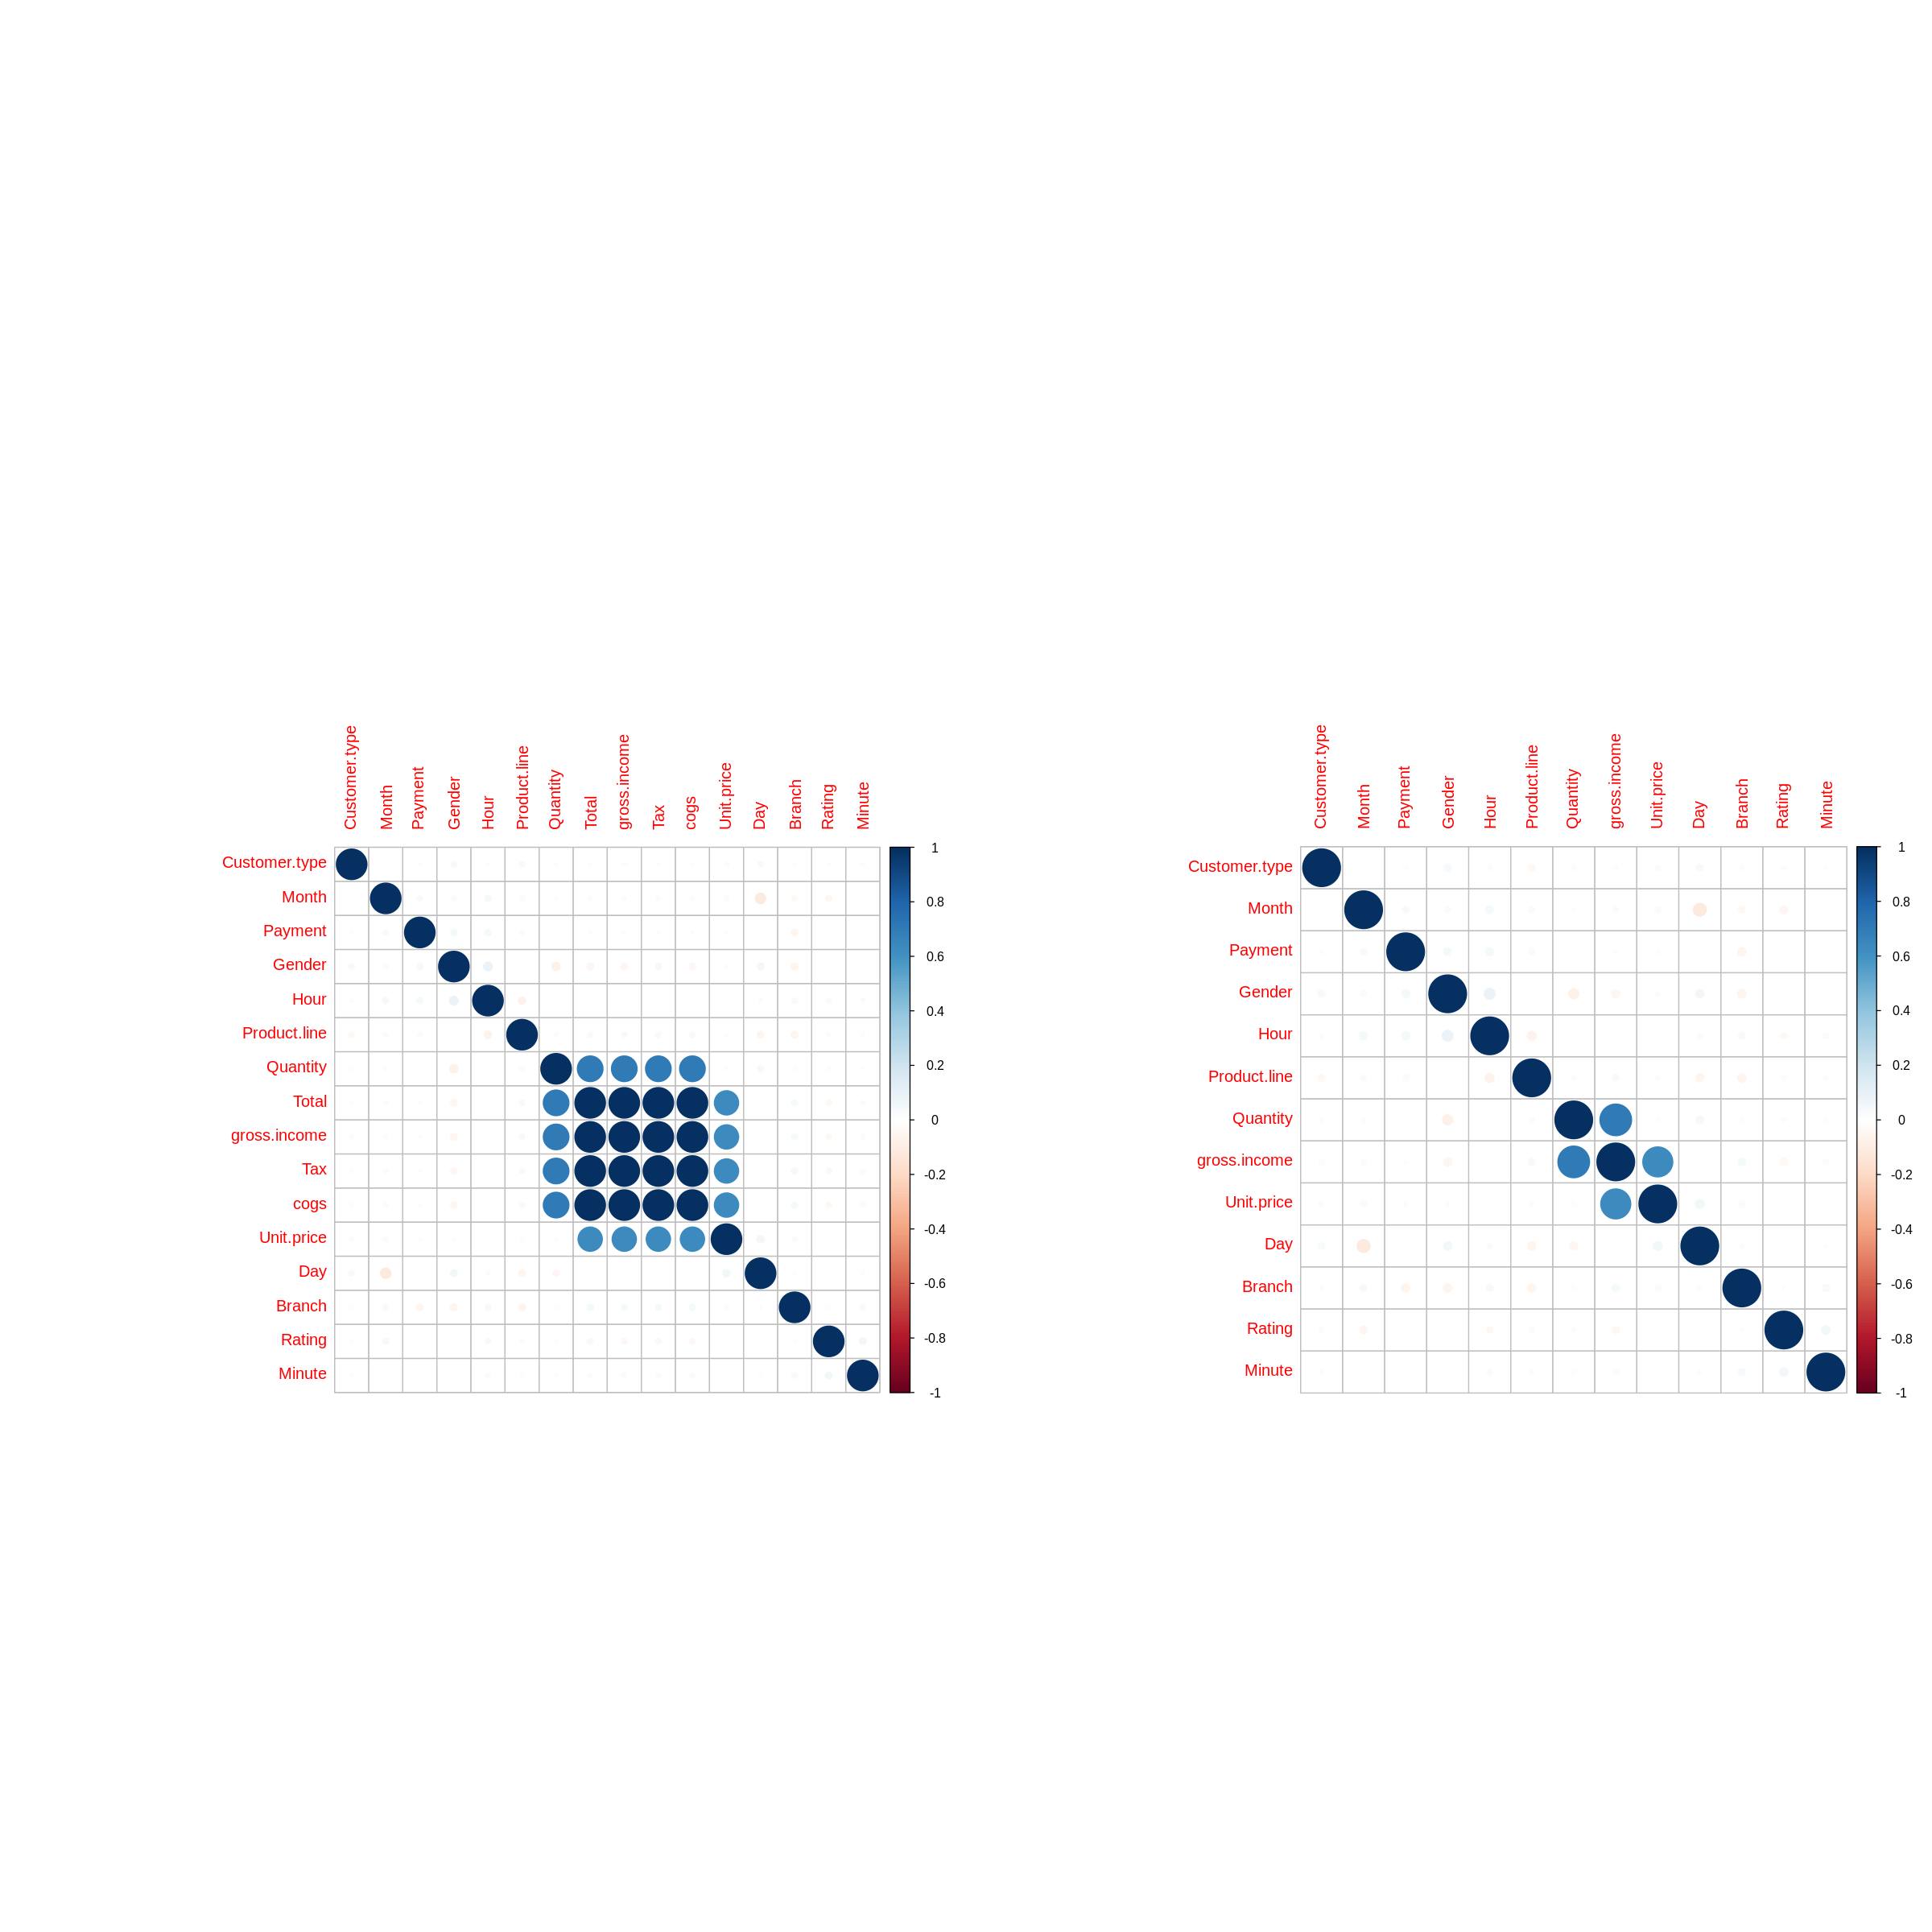

In [40]:
# Performing our graphical comparison
# ---
# 
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(data_filtered), order = "hclust")

##**Wrapper Method**

In [41]:
# Installing and loading our clustvarsel package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(clustvarsel, quietly=TRUE))
                install.packages("clustvarsel")))
                         
library(clustvarsel)


Loading required package: mclust

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.

Package 'clustvarsel' version 2.3.4

Type 'citation("clustvarsel")' for citing this R package in publications.



In [42]:
# Installing and loading our mclust package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(mclust, quietly=TRUE))
                install.packages("mclust")))
library(mclust)

In [43]:
data_sc <- scale(data)

In [44]:
head(data_sc)

Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total,Day,Month,Hour,Minute
-1.208365,-0.9975029,-0.9975029,0.3194568,0.71780097,0.5096752,0.91914693,1.20292607,0.91914693,0.91914693,1.2378240,0.91914693,-1.1797234,-1.188860423,-0.5993366,-1.309070497
1.237718,1.0015009,-0.9975029,-1.4293941,-1.52454035,-0.1744526,-0.98723557,-1.20533433,-0.98723557,-0.98723557,1.5287619,-0.98723557,-0.8346405,1.205621799,-1.5407031,-0.065044774
-1.208365,1.0015009,1.0015009,0.9024071,-0.35260468,0.5096752,0.07141032,-0.00120413,0.07141032,0.07141032,0.2486355,0.07141032,-1.4097787,1.205621799,-0.5993366,-0.420480694
-1.208365,-0.9975029,1.0015009,0.3194568,0.09616553,0.8517391,0.67544187,1.20292607,0.67544187,0.67544187,0.8305111,0.67544187,1.3508845,-1.188860423,1.5971851,0.171912507
-1.208365,1.0015009,1.0015009,1.4853574,1.15638044,0.5096752,1.26649176,1.20292607,1.26649176,1.26649176,-0.9733034,1.26649176,-0.8346405,0.008380688,-1.5407031,0.408869788
1.237718,1.0015009,1.0015009,-1.4293941,1.12165642,0.5096752,1.23899114,1.20292607,1.23899114,1.23899114,-1.6715541,1.23899114,1.1208293,1.205621799,0.9696074,-0.005805453


In [45]:
# Sequential forward greedy search (default)
# ---
#
out = clustvarsel(data_sc, G = 1:5)
out

------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step  BICclust Model G     BICdiff Decision
      Product.line          Add -2442.325     E 5    408.3674 Accepted
            Gender          Add 59356.688   EEI 4  64649.7044 Accepted
     Customer.type          Add -7269.109   VII 5 -63775.1041 Rejected
            Gender       Remove -2418.792     E 5  64626.1713 Rejected

Selected subset: Product.line, Gender

Variable product.line and month have been accepted while the rest have been rejected.

In [46]:
out$subset

Product.line       Gender 
           4            3

In [47]:
#Building a clustering model
Subset1 = data_sc[, out$subset]
mod = Mclust(Subset1, G = 1:5)
summary(mod)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components: 

 log-likelihood    n df   BIC     ICL
       29824.31 1000 15 59545 59536.7

Clustering table:
  1   2   3 
231 270 499 

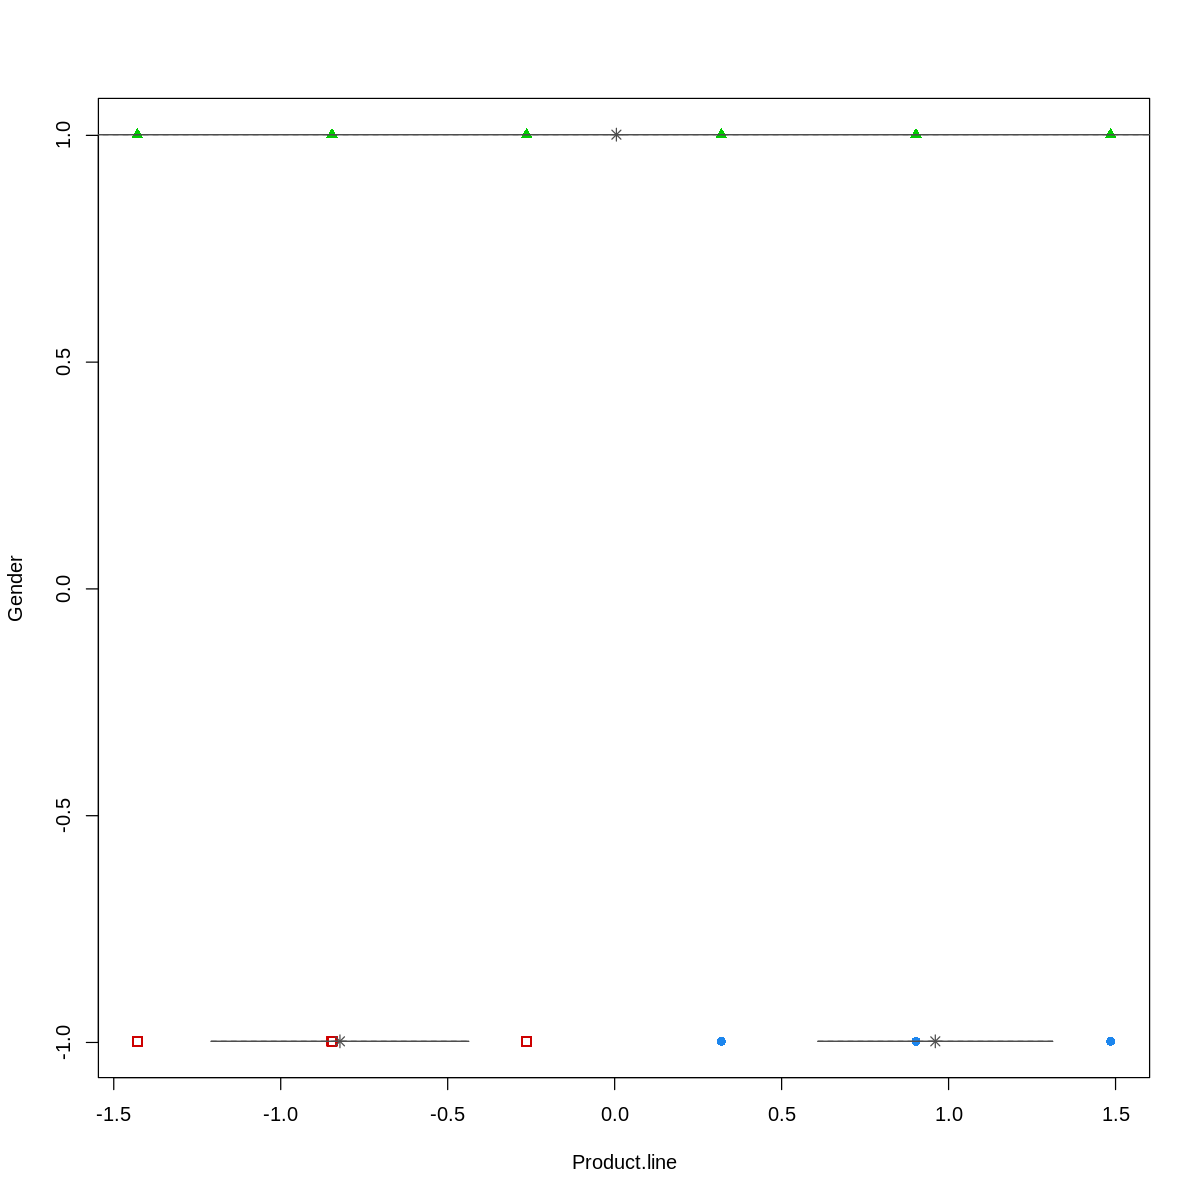

In [48]:
# plotting
options(repr.plot.width = 10, repr.plot.height = 10)
plot(mod ,c("classification"))

##**Embedded Method**

In [49]:
# We install and load our wskm package
# ---
#
suppressWarnings(
        suppressMessages(if
                         (!require(wskm, quietly=TRUE))
                install.packages("wskm")))
library(wskm)

set.seed(2)
model <- ewkm(data[1:16], 3, lambda=2, maxiter=1000)

Loading required package: latticeExtra


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer


Loading required package: fpc



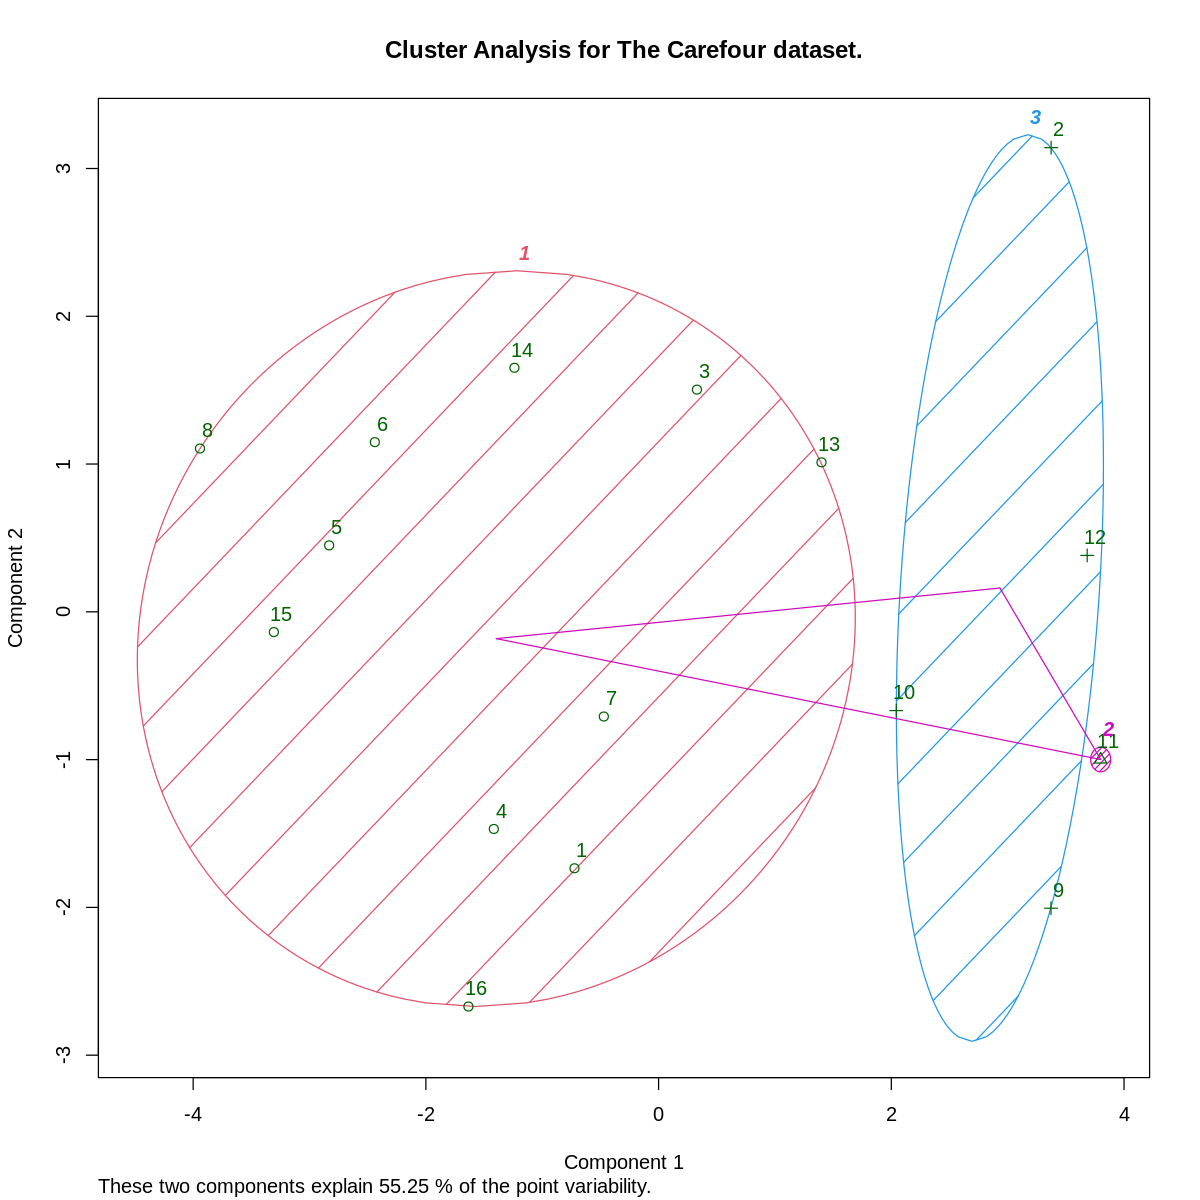

In [50]:
# Loading and installing our cluster package
suppressWarnings(
        suppressMessages(if
                         (!require(cluster, quietly=TRUE))
                install.packages("cluster")))
library("cluster")

# Cluster Plot against 1st 2 principal components
# ---
#
clusplot(data[1:16], model$cluster, color=TRUE, shade=TRUE,
         labels=2, lines=1,main='Cluster Analysis for The Carefour dataset.')

These two components explain 55.25% of the point variability.

In [51]:
#Checking the weights stored in the model.
round(model$weights*100,2)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total,Day,Month,Hour,Minute
1,5.29,42.77,39.05,0.00,0.00,0.00,0.00,5.29,0.00,0.00,0.00,0.00,0.00,7.60,0.00,0.00
2,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25
3,13.41,25.05,25.05,1.25,0.00,2.99,0.04,22.10,0.00,0.04,0.86,0.00,0.00,9.21,0.00,0.00


##**Feature Ranking**

In [52]:
# We install and load the required packages
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(FSelector, quietly=TRUE))
                install.packages("FSelector")))
library(FSelector)

In [53]:
# From the FSelector package, we use the correlation coefficient as a unit of valuation. 
Scores <- linear.correlation(Total~., data)
Scores

,attr_importance
,<dbl>
Branch,0.04104666
Customer.type,0.01967028
Gender,0.04945099
Product.line,0.03162072
Unit.price,0.63396209
Quantity,0.70551019
Tax,1.00000000
Payment,0.01243364
cogs,1.00000000


In [54]:
# cutoff.k: The algorithms select a subset from a ranked attributes. 
# ---
#
Subset <- cutoff.k(Scores, 5)
as.data.frame(Subset)

Subset
<chr>
Tax
cogs
gross.income
Quantity
Unit.price


In [55]:
Subset2 <-cutoff.k.percent(Scores, 0.4)
as.data.frame(Subset2)

Subset2
<chr>
Tax
cogs
gross.income
Quantity
Unit.price
Gender


In [56]:
Scores2 <- information.gain(Total~., data)

# Choosing Variables by cutoffSubset <- cutoff.k(Scores2, 5)
# ---
# 
Subset3 <- cutoff.k(Scores2, 5)
as.data.frame(Subset3)

Subset3
<chr>
Tax
cogs
gross.income
Quantity
Unit.price


Using feature ranking we find out that the variables that rank first(based on the correlation coefficient) are Tax, cogs and gross.income.